## Predictive Analytics Individual


Dataset from UCI machine learning repository

https://archive.ics.uci.edu/dataset/963/ur3+cobotops

# Data Preperation and Cleaning

In [2]:
# Importing dataset
# I uploaded my data to google drive, which I will then access to get image data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/My Drive/MSc BA/Predictive Analytics/cobot_data.csv'

df = pd.read_csv(dataset_path)

df.head()

Mounted at /content/drive


,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,False,False
1,2,2022-10-26T08:17:22.852Z,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.390000e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,False,False
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,False,False
3,4,2022-10-26T08:17:24.863Z,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,False,False
4,5,2022-10-26T08:17:25.877Z,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,False,False


Handling missing values

In [3]:
# Checking for missing values

for col in df.columns:
  print(col, df[col].isnull().sum())

Num 0
Timestamp 0
Current_J0 46
Temperature_T0 54
Current_J1 54
Temperature_J1 54
Current_J2 54
Temperature_J2 54
Current_J3 54
Temperature_J3 54
Current_J4 54
Temperature_J4 54
Current_J5 54
Temperature_J5 54
Speed_J0 54
Speed_J1 54
Speed_J2 54
Speed_J3 54
Speed_J4 54
Speed_J5 54
Tool_current 54
cycle  0
Robot_ProtectiveStop 54
grip_lost 0


In [4]:
# Calculate proportoin of missing values

missing_proportion = df.isnull().mean()
print(missing_proportion)

Num                     0.000000
Timestamp               0.000000
Current_J0              0.006209
Temperature_T0          0.007288
Current_J1              0.007288
Temperature_J1          0.007288
Current_J2              0.007288
Temperature_J2          0.007288
Current_J3              0.007288
Temperature_J3          0.007288
Current_J4              0.007288
Temperature_J4          0.007288
Current_J5              0.007288
Temperature_J5          0.007288
Speed_J0                0.007288
Speed_J1                0.007288
Speed_J2                0.007288
Speed_J3                0.007288
Speed_J4                0.007288
Speed_J5                0.007288
Tool_current            0.007288
cycle                   0.000000
Robot_ProtectiveStop    0.007288
grip_lost               0.000000
dtype: float64


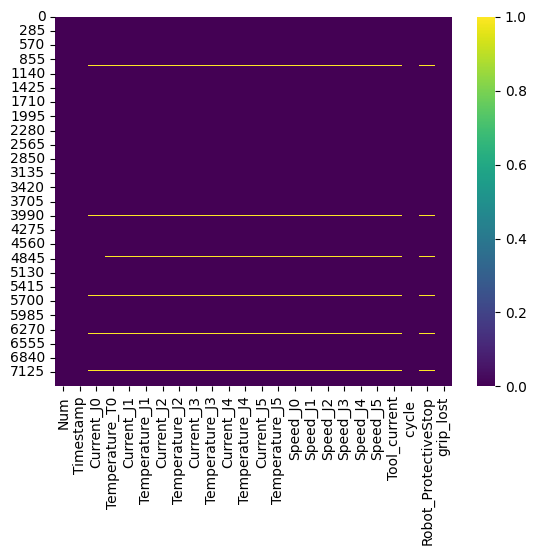

In [5]:
# Mapping where missing values are on the dataset, to determine whether to drop, impute, or fill with something
import seaborn as sns

sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.show()

In [6]:
# Since these missing values appear across multiple columns, we choose to drop the rows

df.dropna(inplace=True)
df.isnull().sum()

# Check again for missing values
for col in df.columns:
  print(col, df[col].isnull().sum())

# Dropping Num column as it represents row num
df.drop(columns=['Num'], inplace=True)
# Dropping cycle column as it represents what task the robot is on, which is not relevant to our analysis
df.drop(columns=['cycle '], inplace=True)

print(df.head())

Num 0
Timestamp 0
Current_J0 0
Temperature_T0 0
Current_J1 0
Temperature_J1 0
Current_J2 0
Temperature_J2 0
Current_J3 0
Temperature_J3 0
Current_J4 0
Temperature_J4 0
Current_J5 0
Temperature_J5 0
Speed_J0 0
Speed_J1 0
Speed_J2 0
Speed_J3 0
Speed_J4 0
Speed_J5 0
Tool_current 0
cycle  0
Robot_ProtectiveStop 0
grip_lost 0
                  Timestamp  Current_J0  Temperature_T0  Current_J1  \
0  2022-10-26T08:17:21.847Z    0.109628          27.875   -2.024669   
1  2022-10-26T08:17:22.852Z    0.595605          27.875   -2.278456   
2  2022-10-26T08:17:23.857Z   -0.229474          27.875   -2.800408   
3  2022-10-26T08:17:24.863Z    0.065053          27.875   -3.687768   
4  2022-10-26T08:17:25.877Z    0.884140          27.875   -2.938830   

   Temperature_J1  Current_J2  Temperature_J2  Current_J3  Temperature_J3  \
0         29.3750   -1.531442         29.3750   -0.998570         32.1250   
1         29.3125   -0.866556         29.4375   -0.206097         32.1875   
2         29.3125  

Checking Time/Seasonality

In [7]:
# Converting Time to timestamp

# Some rows have timestamp in quotes
df['Timestamp'] = df['Timestamp'].str.replace('"', '')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

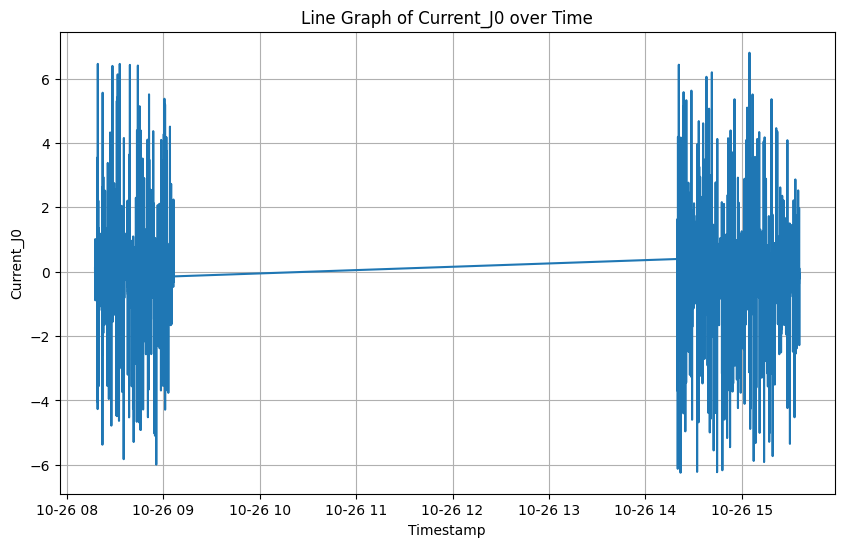

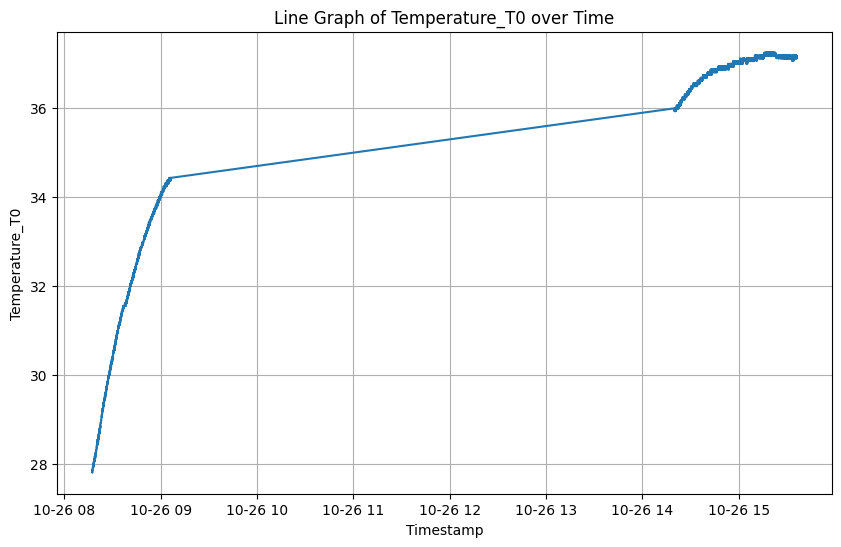

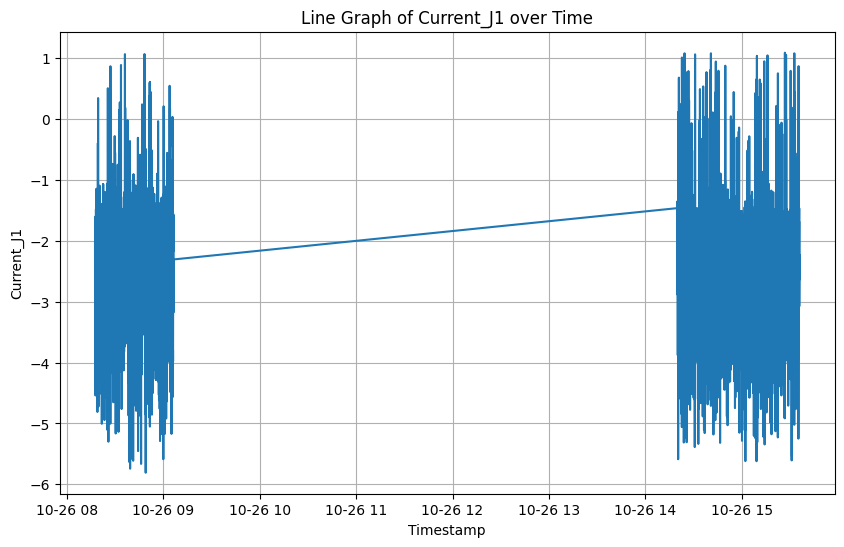

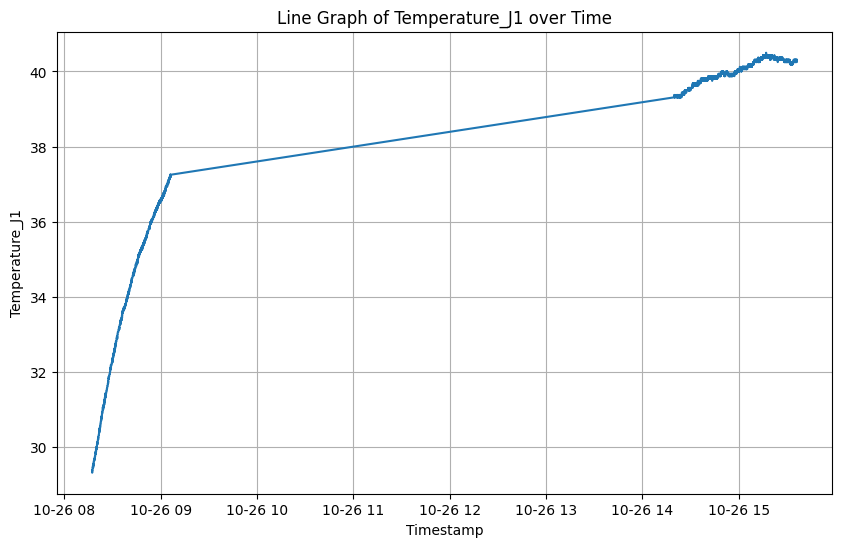

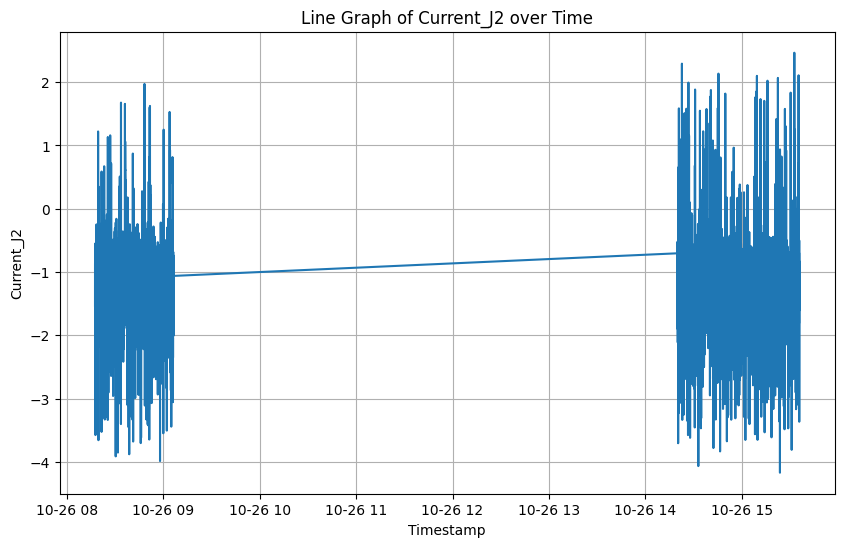

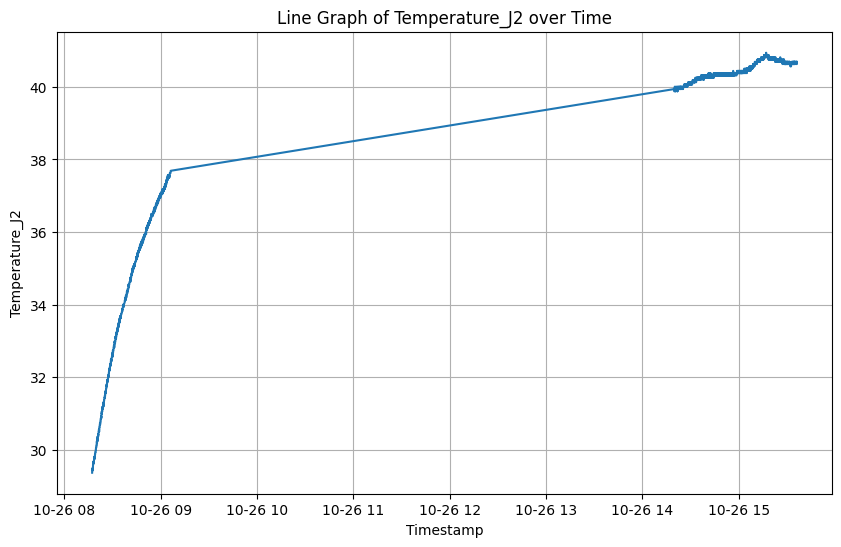

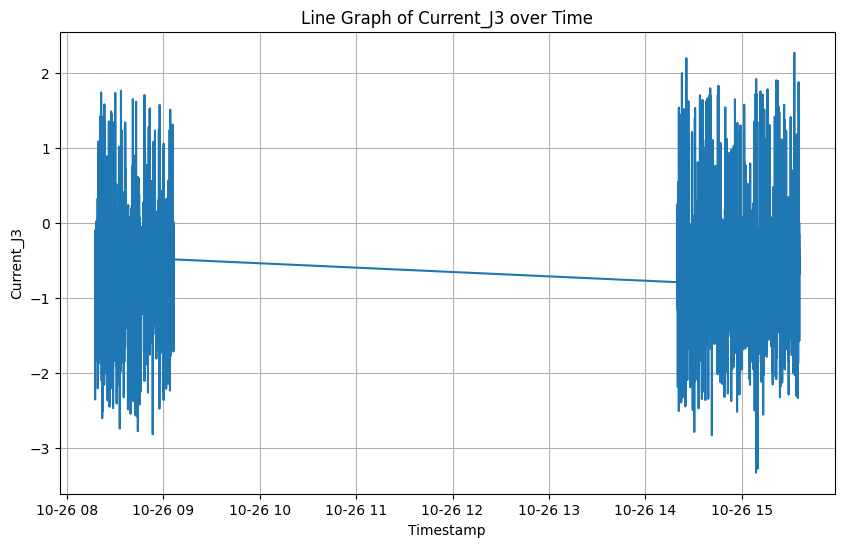

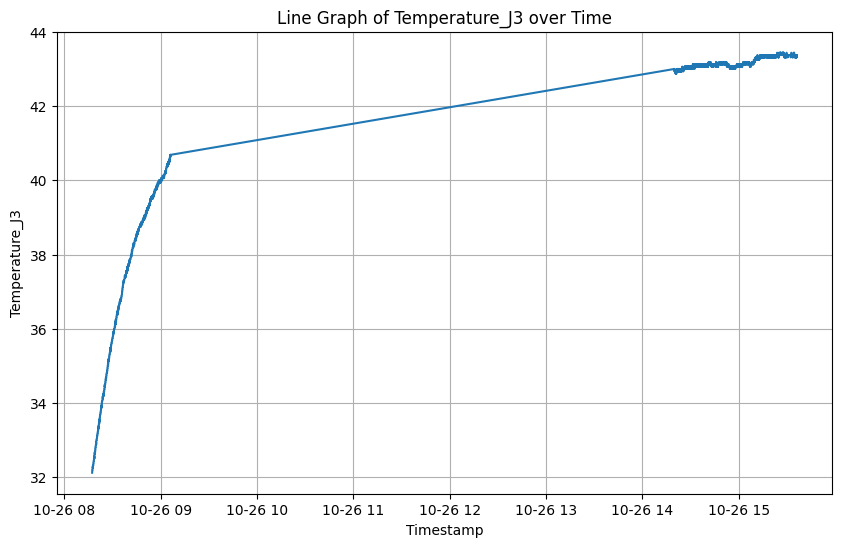

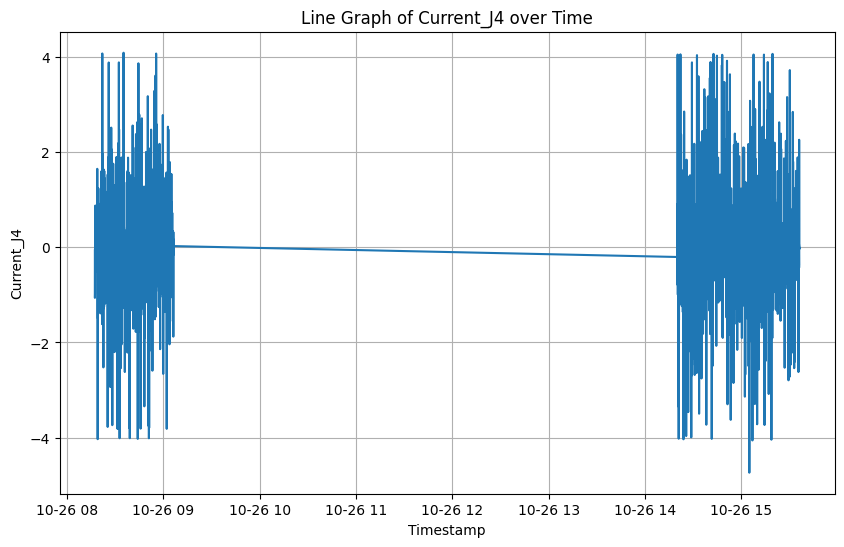

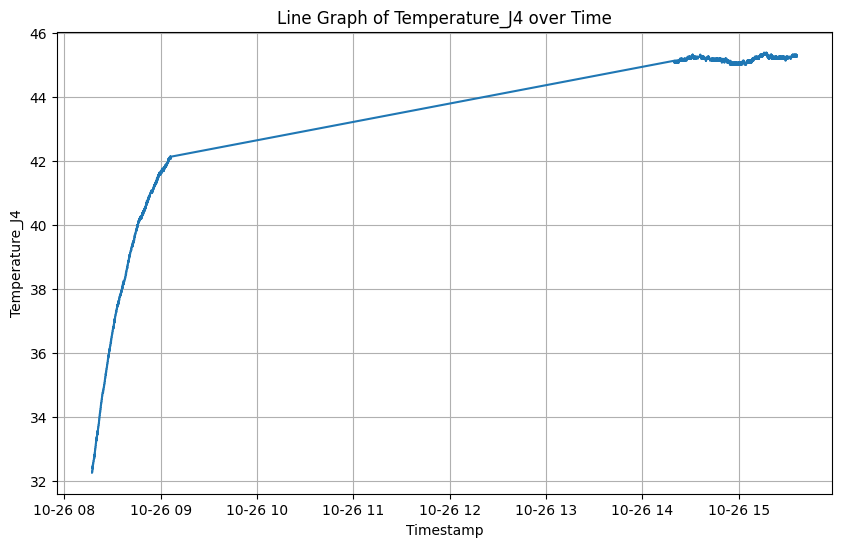

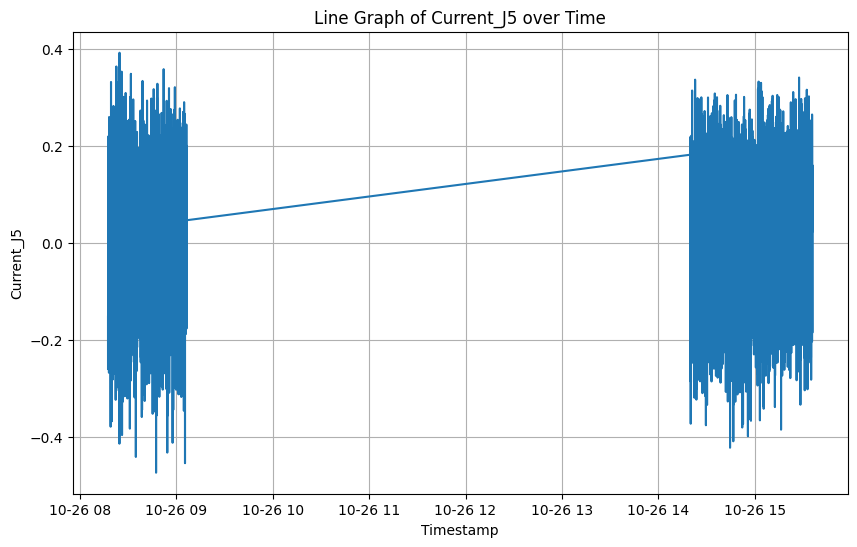

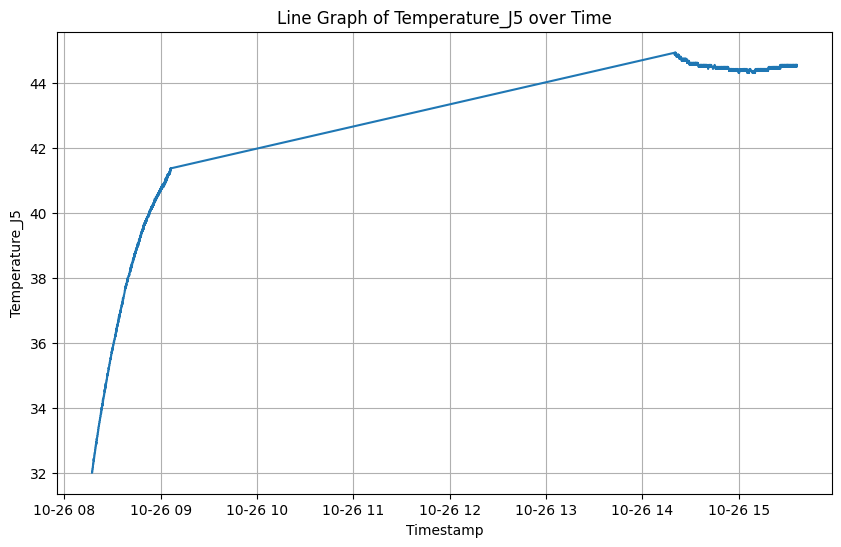

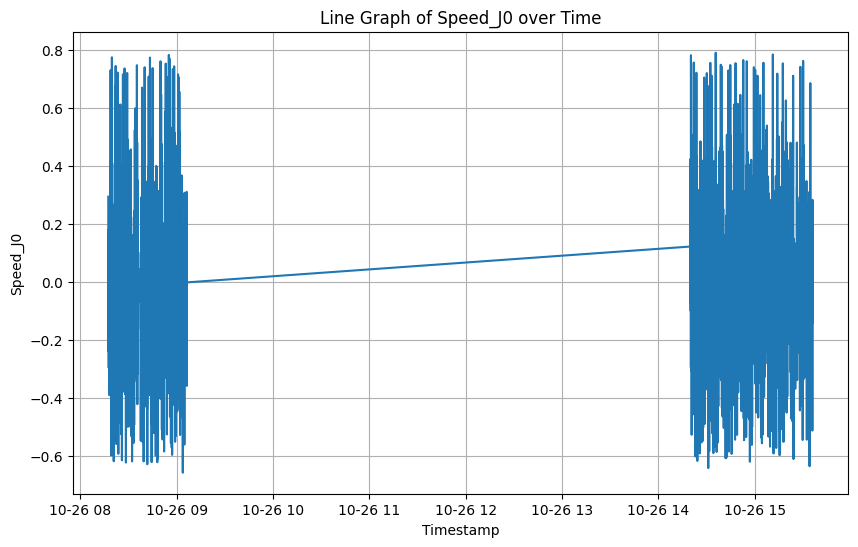

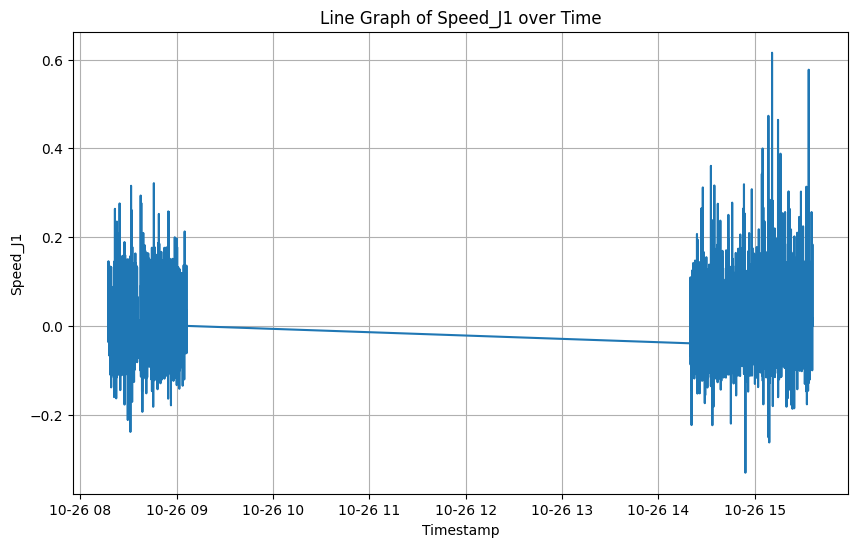

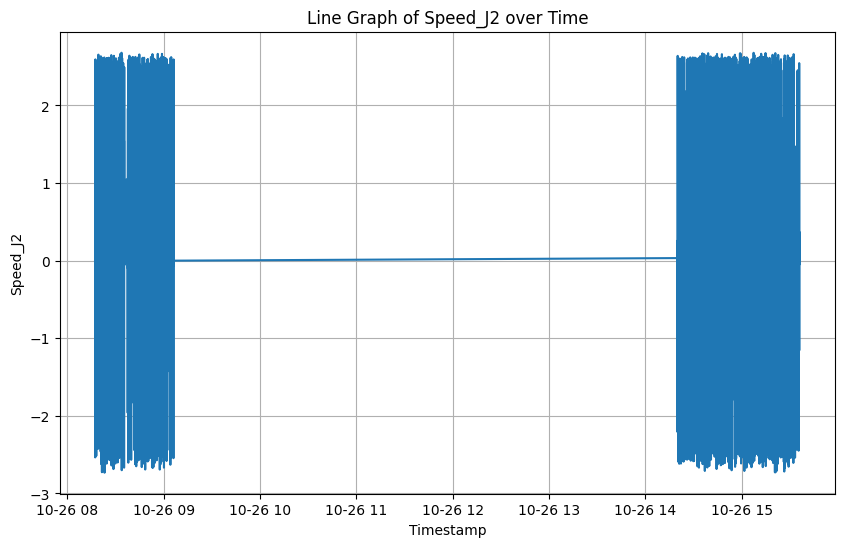

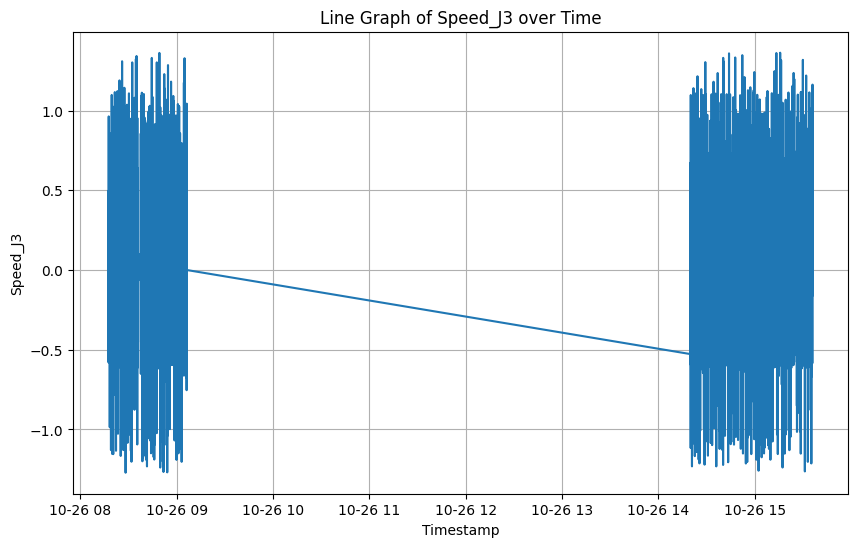

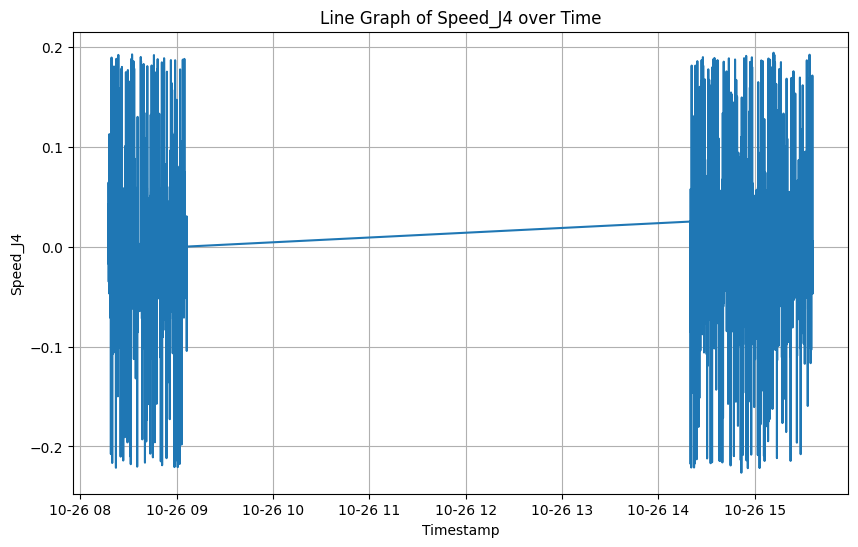

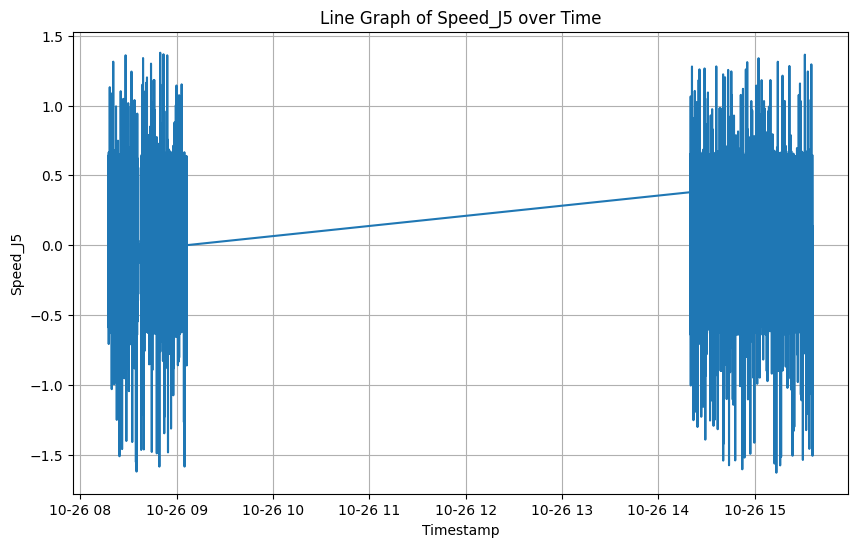

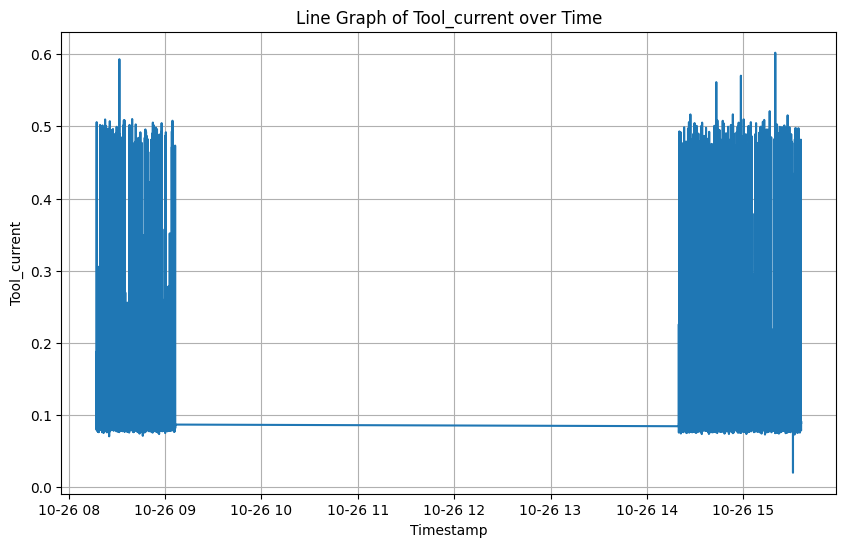

In [8]:
# Checking variation of features over time

for col in df.columns:
    if col != 'Timestamp' and col != 'Robot_ProtectiveStop' and col != 'grip_lost':
        plt.figure(figsize=(10, 6))
        plt.plot(df['Timestamp'], df[col])
        plt.xlabel('Timestamp')
        plt.ylabel(col)
        plt.title(f'Line Graph of {col} over Time')
        plt.grid(True)
        plt.show()

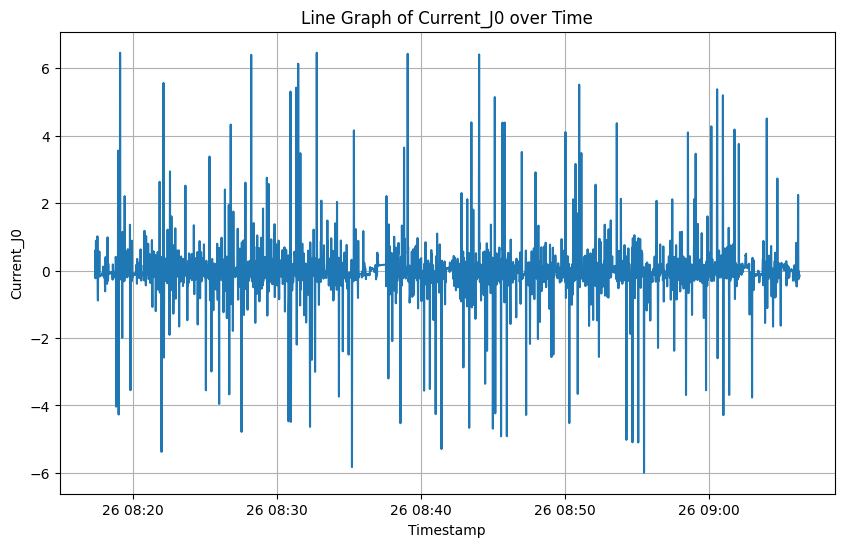

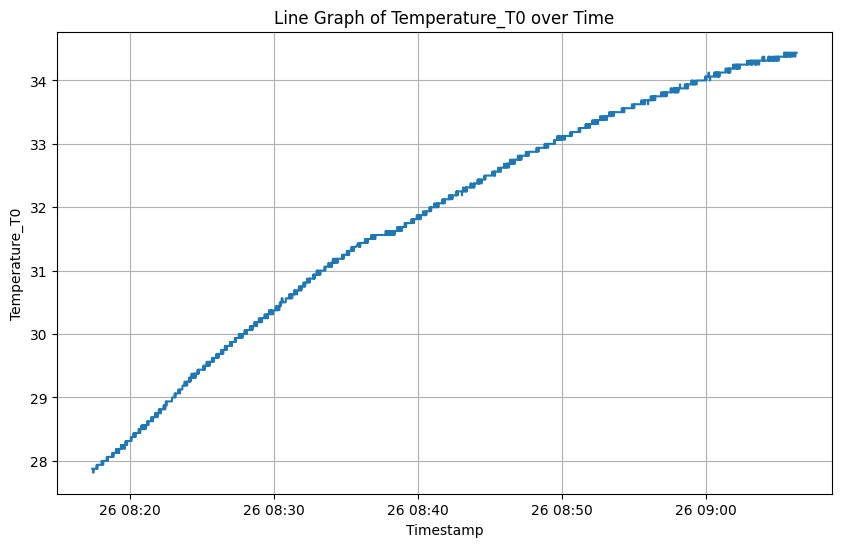

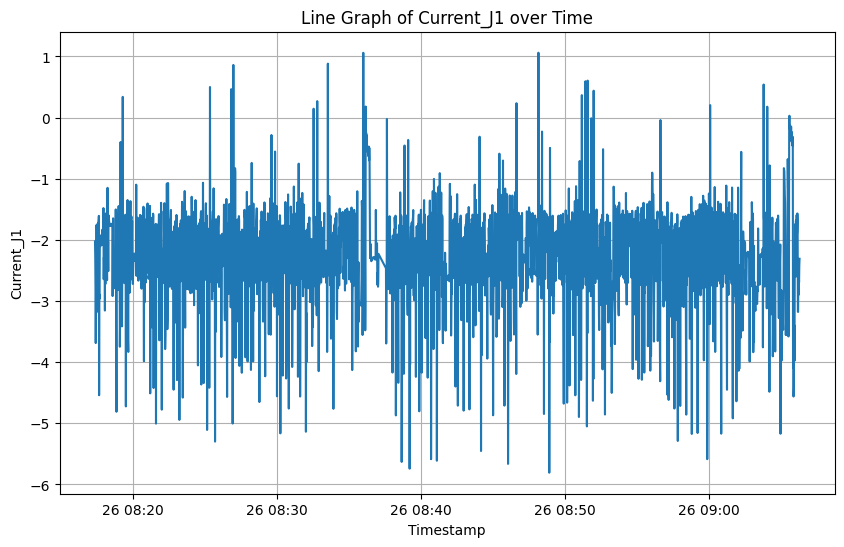

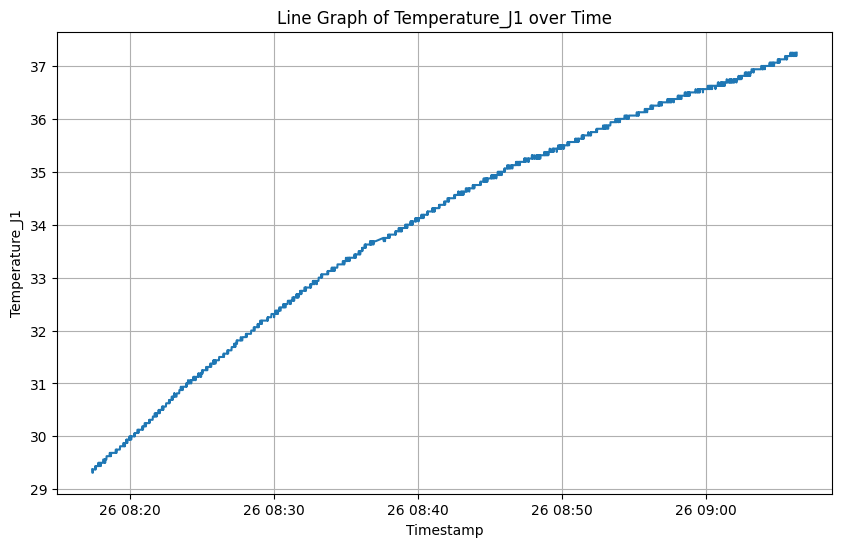

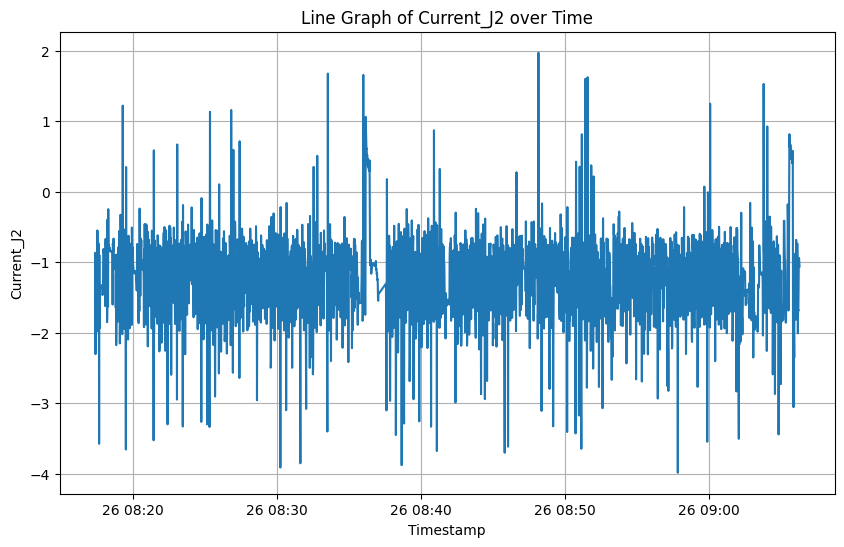

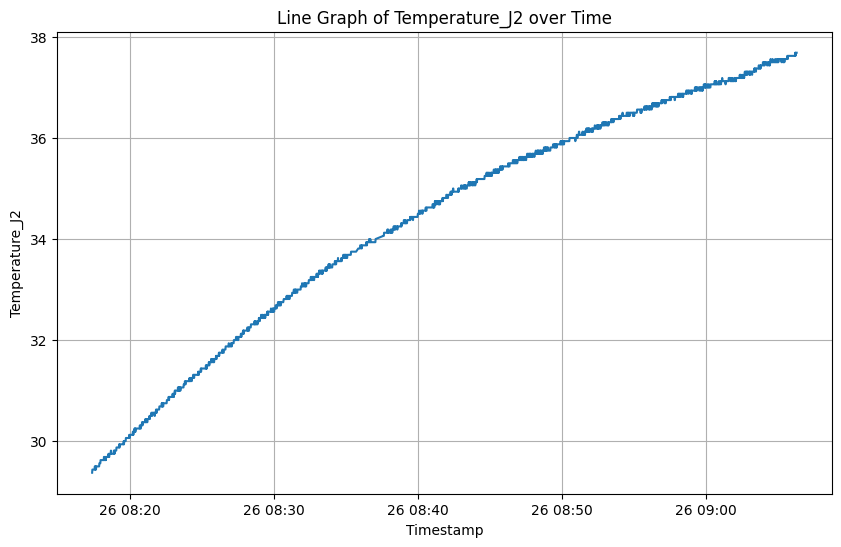

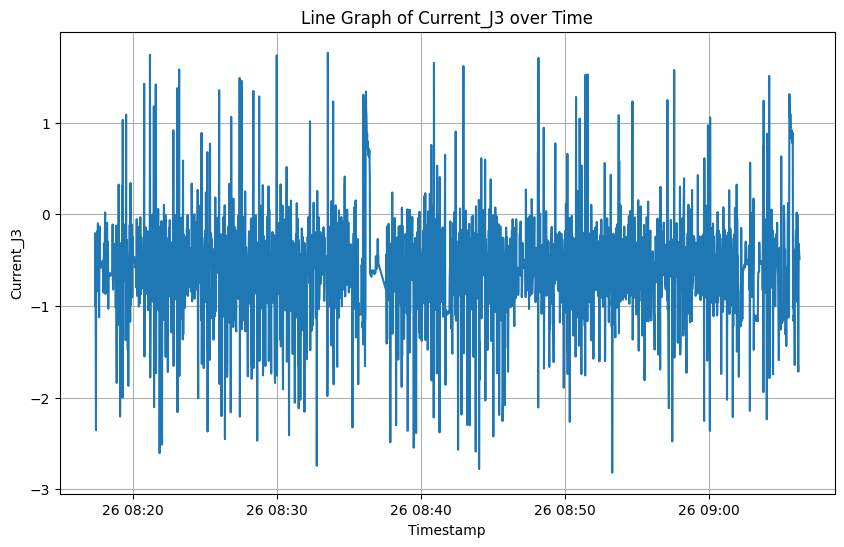

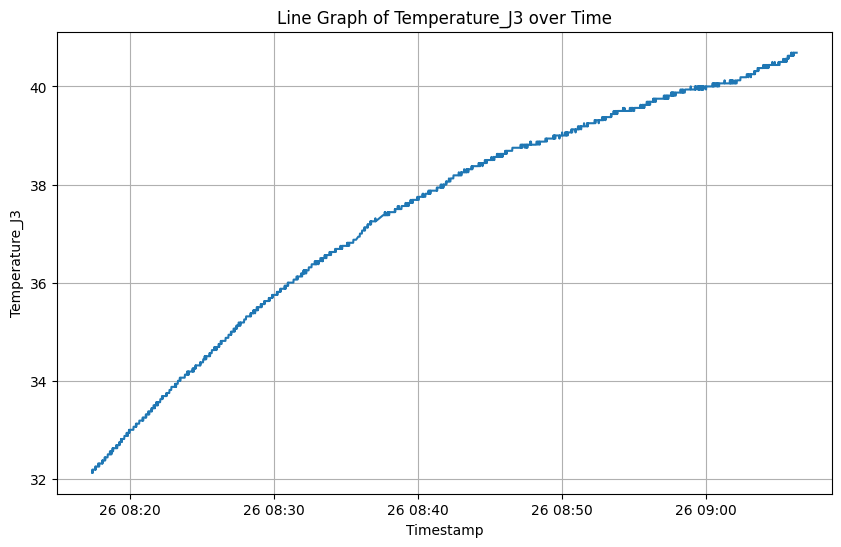

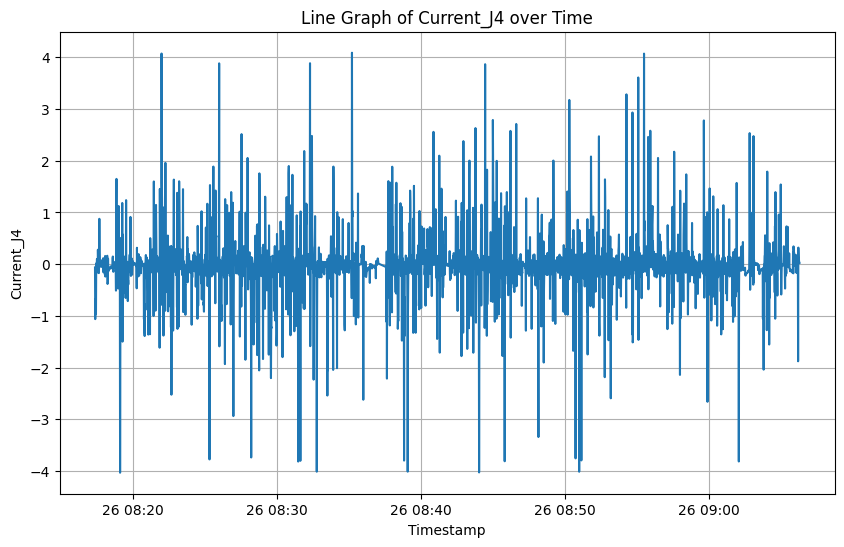

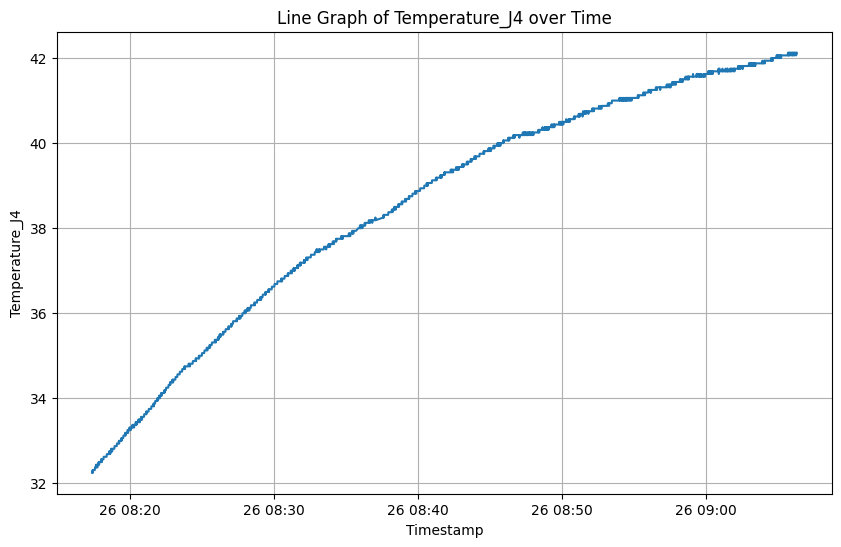

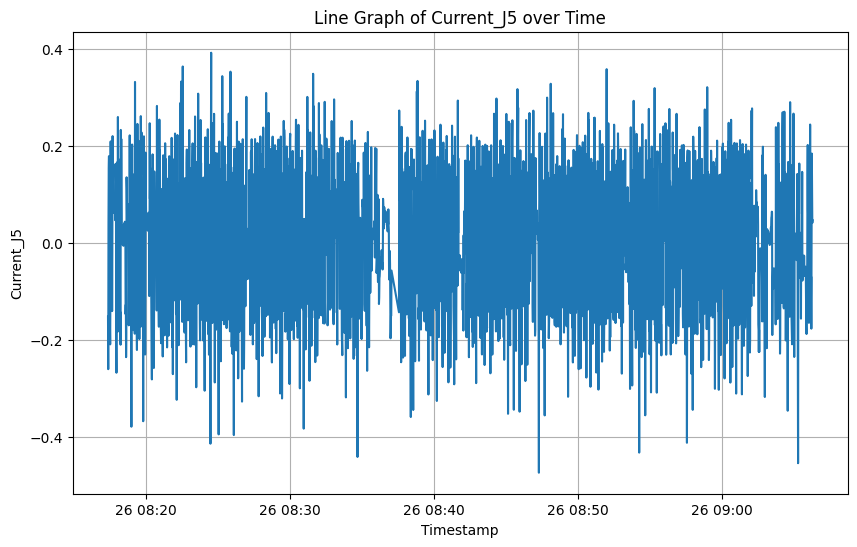

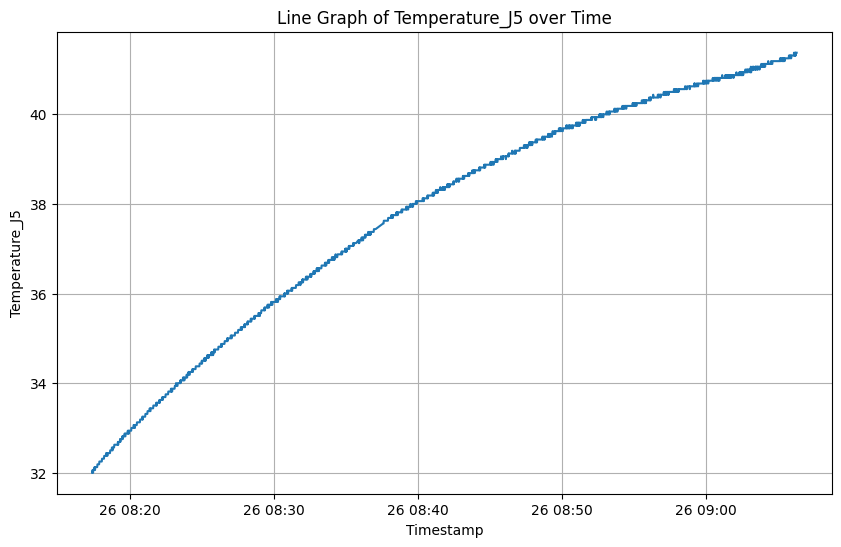

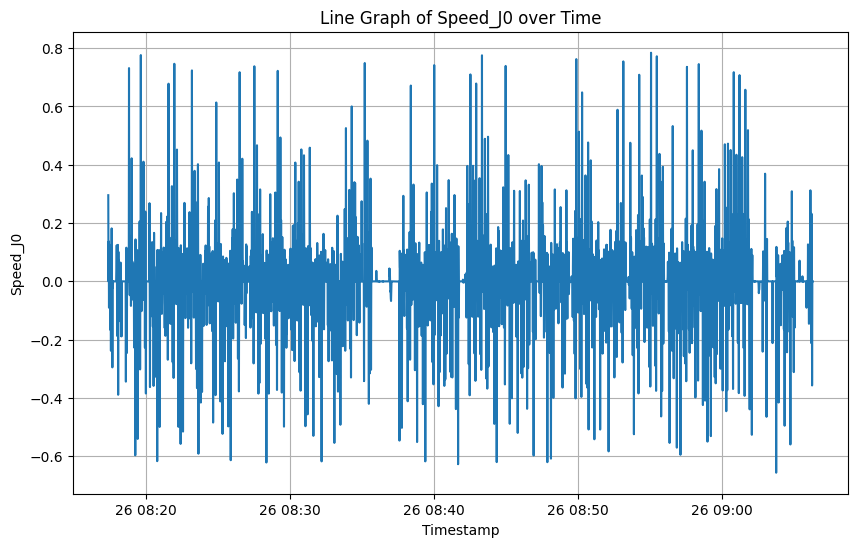

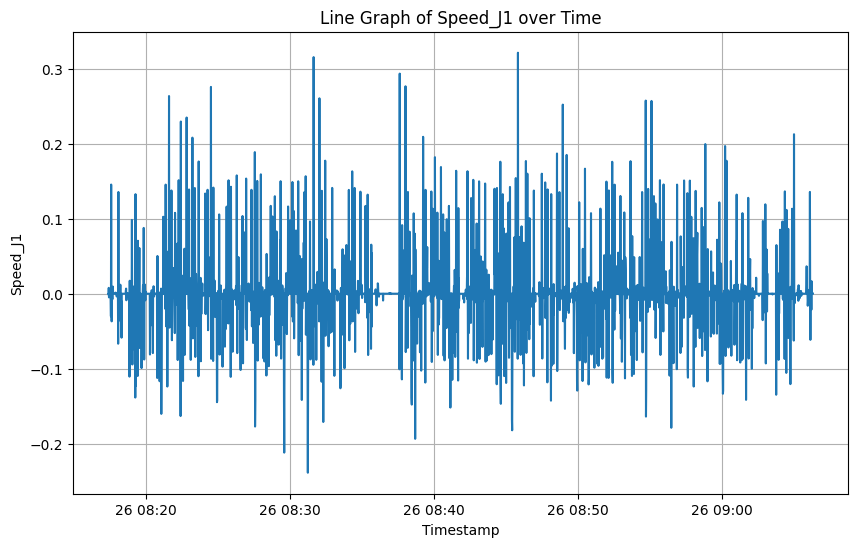

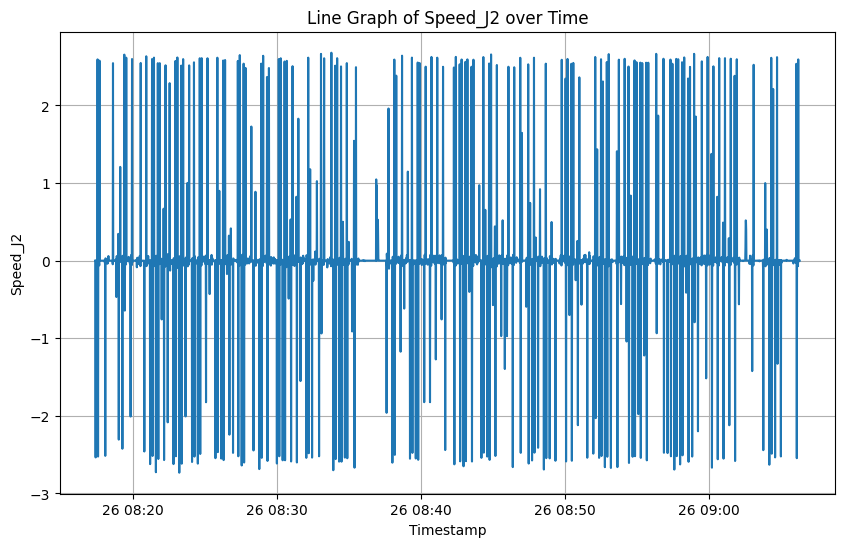

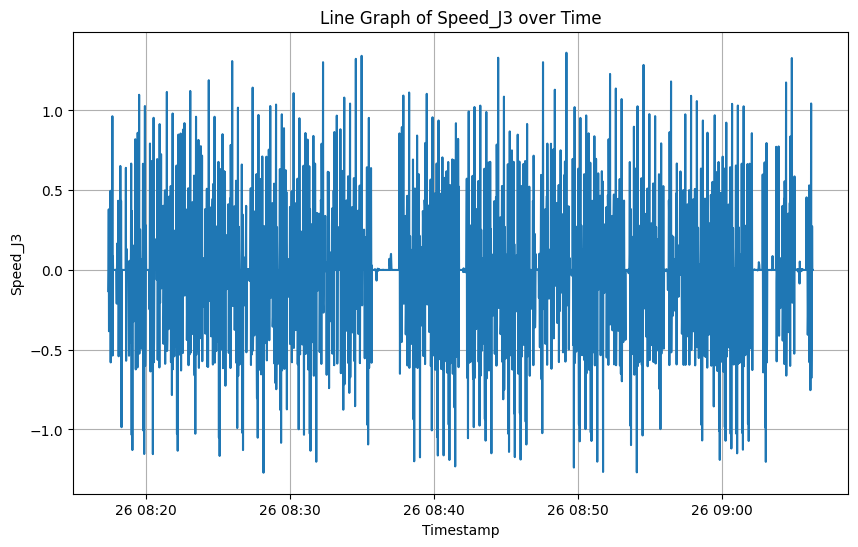

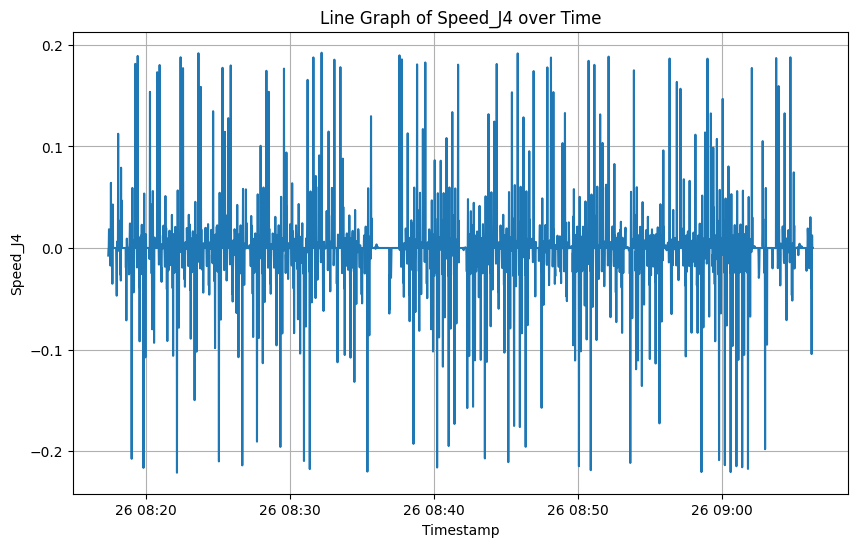

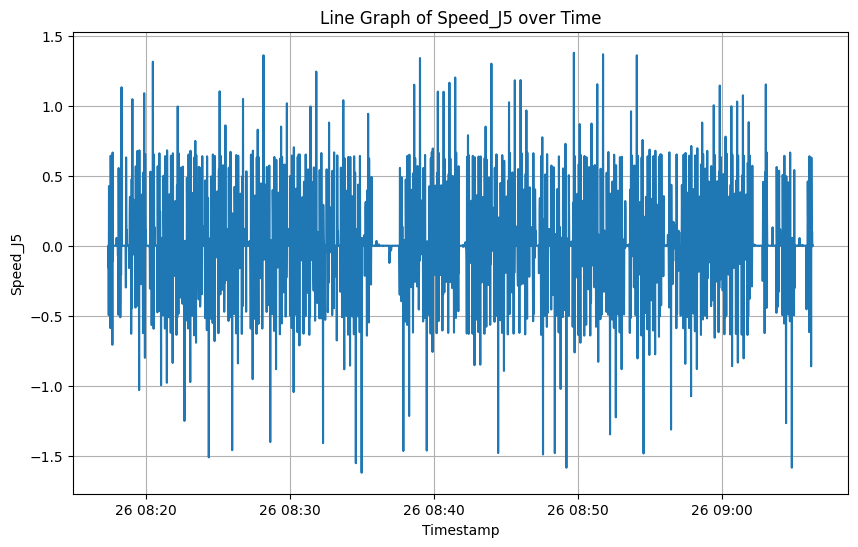

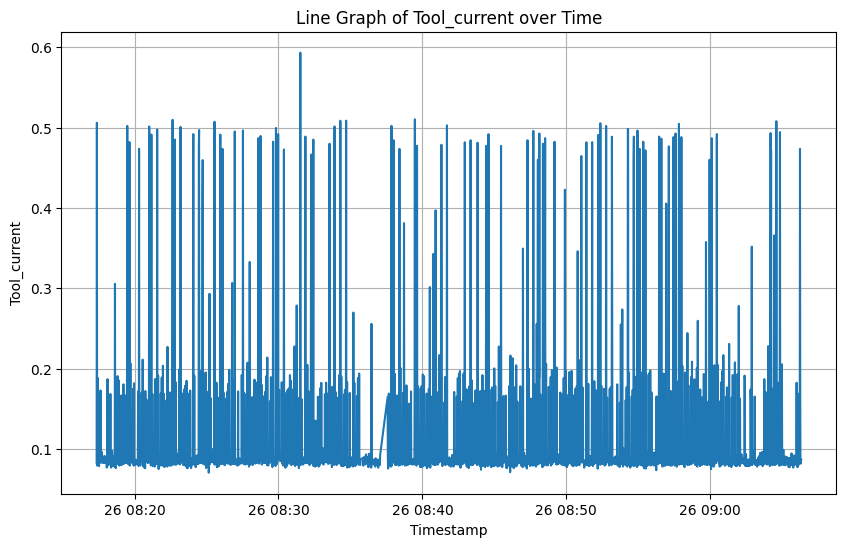

In [9]:
# The graphs above show a big gap in timing, (just after 9am and just after 2pm)
# to preserve continuity of the data, we will only keep the first part (up until just after 9am)

df_continuous = df[df['Timestamp'] < '2022-10-26 09:06:20']

for col in df_continuous.columns:
    if col != 'Timestamp' and col != 'Robot_ProtectiveStop' and col != 'grip_lost':
        plt.figure(figsize=(10, 6))
        plt.plot(df_continuous['Timestamp'], df_continuous[col])
        plt.xlabel('Timestamp')
        plt.ylabel(col)
        plt.title(f'Line Graph of {col} over Time')
        plt.grid(True)
        plt.show()

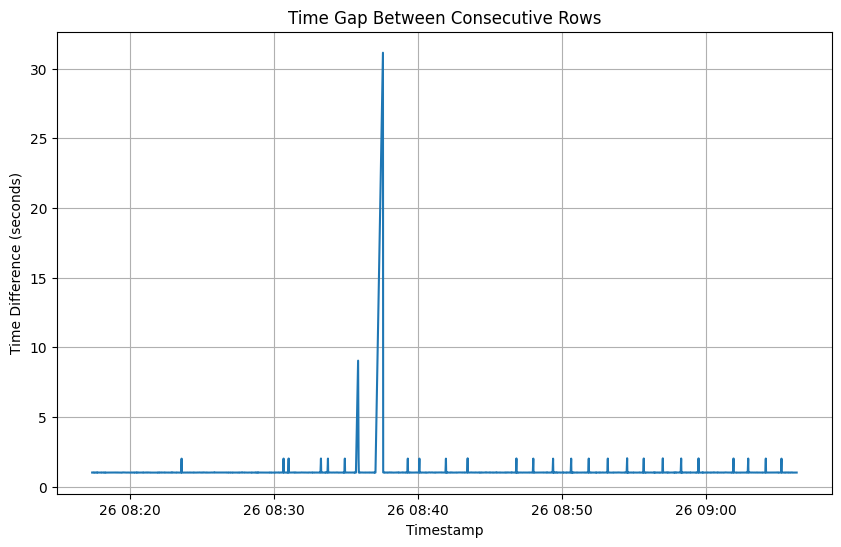

In [10]:
# Graph of time gap between each row of data in df_continuous

# Calculate time differences between consecutive rows
time_diffs = df_continuous['Timestamp'].diff().dt.total_seconds()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df_continuous['Timestamp'][1:], time_diffs[1:])  # Exclude the first row as diff() results in NaN
plt.xlabel('Timestamp')
plt.ylabel('Time Difference (seconds)')
plt.title('Time Gap Between Consecutive Rows')
plt.grid(True)
plt.show()

The graph above shows how there is some large gaps in time difference, however, this is something that cannot be fixed as using imputation would also mean we have to predict the target feature, which we need a model that we do not currently have to do.

In [11]:
# Above shows a quite big spike in time difference between 8:30 and 8:40, to fix this, whilst all remain quite uniform.
# To fix, we will use polynomial fill, as it can capture more complex trends than forward, backward, or linear fill
# Tried to do polynomial fill for large time gaps, but couldnt since that would also mean I have to fill in target variable which requires using good model (which we havent made yet)

'''
time_diffs = df_continuous['Timestamp'].diff().dt.total_seconds()

# Identify row with large gap seen in graph (>30 sec)
large_gap_index = time_diffs[time_diffs > 30].index

# Fill the time gaps using linear interpolation
df_continuous['Timestamp'] = df_continuous['Timestamp'].interpolate(method='polynomial', order=3) # Changed method to 'linear'

# Recalculate after interpolation
time_diffs_filled = df_continuous['Timestamp'].diff().dt.total_seconds()

# Plot the time differences after filling
plt.figure(figsize=(10, 6))
plt.plot(df_continuous['Timestamp'][1:], time_diffs_filled[1:])  # Exclude the first row as diff() results in NaN
plt.xlabel('Timestamp')
plt.ylabel('Time Difference (seconds)')
plt.title('Time Gap Between Consecutive Rows After Linear Interpolation') # Changed title to reflect change in interpolation method
plt.grid(True)
plt.show()
'''

"\ntime_diffs = df_continuous['Timestamp'].diff().dt.total_seconds()\n\n# Identify row with large gap seen in graph (>30 sec)\nlarge_gap_index = time_diffs[time_diffs > 30].index\n\n# Fill the time gaps using linear interpolation \ndf_continuous['Timestamp'] = df_continuous['Timestamp'].interpolate(method='polynomial', order=3) # Changed method to 'linear'\n\n# Recalculate after interpolation\ntime_diffs_filled = df_continuous['Timestamp'].diff().dt.total_seconds()\n\n# Plot the time differences after filling\nplt.figure(figsize=(10, 6))\nplt.plot(df_continuous['Timestamp'][1:], time_diffs_filled[1:])  # Exclude the first row as diff() results in NaN\nplt.xlabel('Timestamp')\nplt.ylabel('Time Difference (seconds)')\nplt.title('Time Gap Between Consecutive Rows After Linear Interpolation') # Changed title to reflect change in interpolation method\nplt.grid(True)\nplt.show()\n"

Handing Outliers

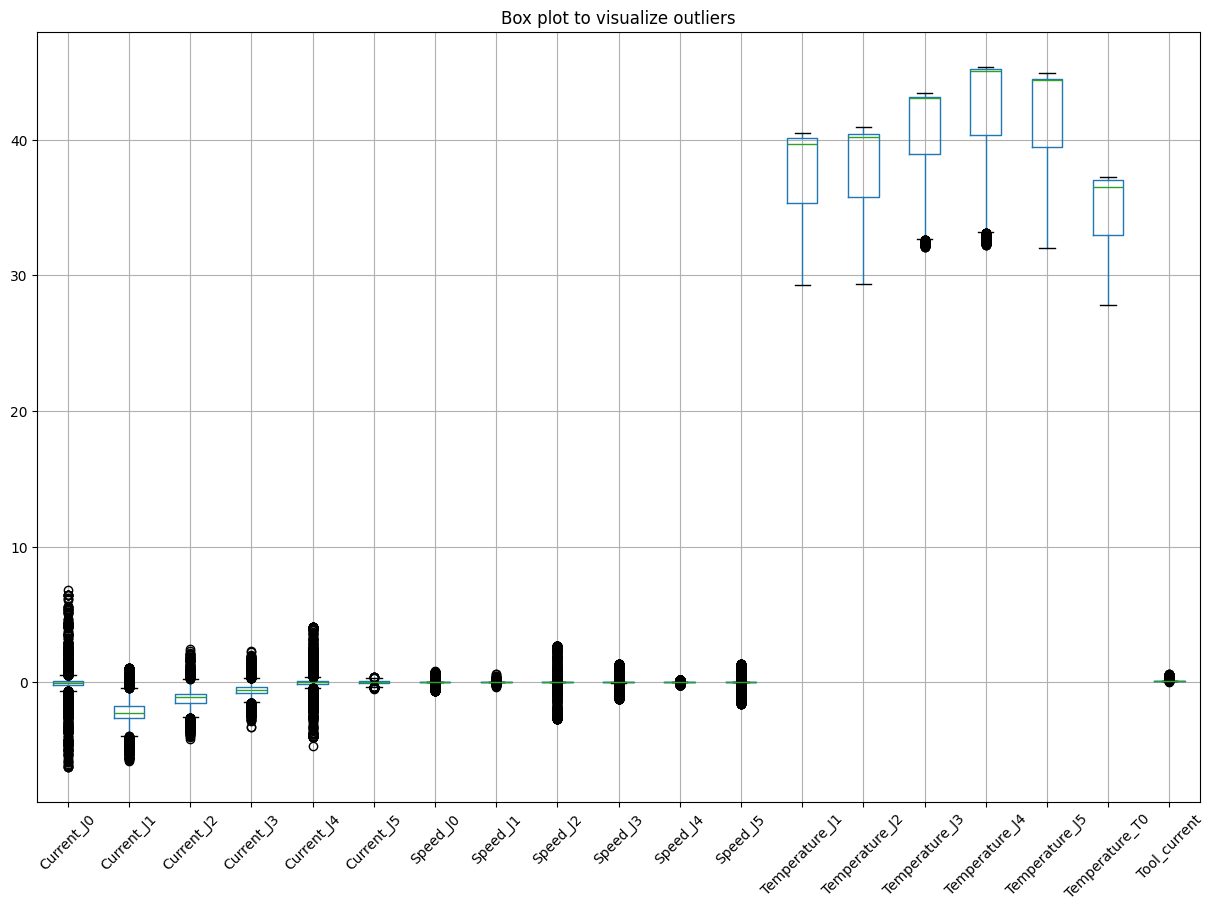

Q1:
 Current_J0                                  -0.194785
Current_J1                                  -2.665052
Current_J2                                  -1.551159
Current_J3                                   -0.82816
Current_J4                                  -0.131354
Current_J5                                  -0.113888
Speed_J0                                    -0.000739
Speed_J1                                    -0.000845
Speed_J2                                    -0.005478
Speed_J3                                    -0.016964
Speed_J4                                    -0.000241
Speed_J5                                    -0.001478
Temperature_J1                                32.1875
Temperature_J2                                   32.5
Temperature_J3                               35.59375
Temperature_J4                                36.4375
Temperature_J5                                 35.625
Temperature_T0                                  30.25
Timestamp         2022-

In [12]:
# Handling outliers using boxplot method
feature_columns = df_continuous.columns.difference(['grip_lost', 'Robot_ProtectiveStop'])

Q1 = df_continuous[feature_columns].quantile(0.25)
Q3 = df_continuous[feature_columns].quantile(0.75)
IQR = Q3 - Q1

plt.figure(figsize=(15, 10))
df[feature_columns].boxplot(rot=45)
plt.title('Box plot to visualize outliers')
plt.show()

# Displaying Q1, Q2, and Q3
print("Q1:\n", Q1)
print("\nQ3:\n", Q3)
print("\nIQR:\n", IQR)

Outliers are shown in the boxplot above. However, these outliers are not removed as it is uncertain that having an outlier in one feature will lead to having outliers in the other features. Furthermore, given that the scope is to predict when errors/malfunctions may happen, therefore having data leading up to that outlier is important

Feature Engineering

In [13]:
# Combining target variables
# It would be easier to combine both target variables (grip_lost, Robot_ProtectiveStop) to a single target variable, rather than training and running multiple models

# Create new dataframe
df_combined_target = df_continuous.copy()

# Create a new column for the combined target variable
df_combined_target['combined_target'] = 0  # Initialize with 0 for "no issues"

# Set to 1 for only grip_lost
df_combined_target.loc[df_combined_target['grip_lost'] == True, 'combined_target'] = 1

# Set to 2 for only Robot_ProtectiveStop
df_combined_target.loc[df_combined_target['Robot_ProtectiveStop'] == 1, 'combined_target'] = 2

# Set to 3 for "both grip_lost and Robot_ProtectiveStop
df_combined_target.loc[(df_combined_target['Robot_ProtectiveStop'] == 1) & (df_combined_target['grip_lost'] == True), 'combined_target'] = 3

df_combined_target.drop(columns=['grip_lost', 'Robot_ProtectiveStop'], inplace=True)

print(df_combined_target.head())

                         Timestamp  Current_J0  Temperature_T0  Current_J1  \
0 2022-10-26 08:17:21.847000+00:00    0.109628          27.875   -2.024669   
1 2022-10-26 08:17:22.852000+00:00    0.595605          27.875   -2.278456   
2 2022-10-26 08:17:23.857000+00:00   -0.229474          27.875   -2.800408   
3 2022-10-26 08:17:24.863000+00:00    0.065053          27.875   -3.687768   
4 2022-10-26 08:17:25.877000+00:00    0.884140          27.875   -2.938830   

   Temperature_J1  Current_J2  Temperature_J2  Current_J3  Temperature_J3  \
0         29.3750   -1.531442         29.3750   -0.998570         32.1250   
1         29.3125   -0.866556         29.4375   -0.206097         32.1875   
2         29.3125   -2.304336         29.4375   -0.351499         32.1250   
3         29.3125   -1.217652         29.4375   -1.209115         32.1250   
4         29.3750   -1.794076         29.4375   -2.356471         32.1875   

   Current_J4  ...  Current_J5  Temperature_J5      Speed_J0  Speed_

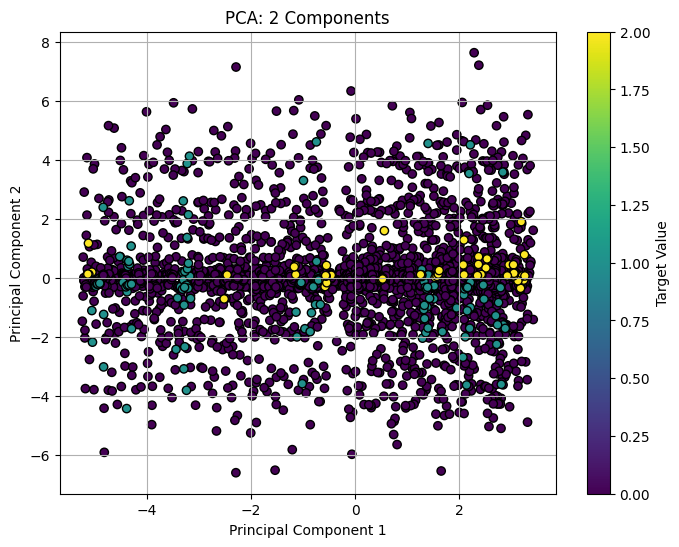

In [14]:
# Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_numeric = df_combined_target.drop(columns=['Timestamp', 'combined_target'])

# Standardising the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric) # Scaling

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Sort indicies based on target variable ascending such that higher target values go to front
# Previously had problem where target values were hidden in the back
sorted_indices = np.argsort(df_combined_target['combined_target'])

pca_result_sorted = pca_result[sorted_indices]  # Sorted PCA components
target_sorted = df_combined_target['combined_target'].iloc[sorted_indices]  # Sorted target values

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result_sorted[:, 0], pca_result_sorted[:, 1], c=target_sorted, cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='Target Value')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2 Components')
plt.grid(True)
plt.show()


As shown above, most of the target variables center around Principal Component 2. However, we will also include Principal component 1 as it represents the maximum variance direction in the data.

https://www.sartorius.com/en/knowledge/science-snippets/what-is-principal-component-analysis-pca-and-how-it-is-used-507186#:~:text=The%20first%20principal%20component%20(PC1)%20is%20the%20line%20that%20best,is%20known%20as%20a%20score.

In [15]:
# Adding PCA 1 and 2 into dataframe

# copy scaled df by having scaled data and copying df_numeric's columns
df_pca_included = pd.DataFrame(df_scaled, columns=df_numeric.columns)


# Add back columns from df_combined_target
df_pca_included['Timestamp'] = df_combined_target['Timestamp']
df_pca_included['combined_target'] = df_combined_target['combined_target']

# add the unsorted pca so that it aligns with the dataframe
df_pca_included['PCA1'] = pca_result[:, 0]
df_pca_included['PCA2'] = pca_result[:, 1]

# re-sort column list
columns_order = ['Timestamp'] + [col for col in df_pca_included.columns if col not in ['Timestamp', 'combined_target']] + ['combined_target']
df_pca_included = df_pca_included[columns_order]

print(df_pca_included.head())

                         Timestamp  Current_J0  Temperature_T0  Current_J1  \
0 2022-10-26 08:17:21.847000+00:00    0.175640       -2.035488    0.318935   
1 2022-10-26 08:17:22.852000+00:00    0.742332       -2.035488   -0.001061   
2 2022-10-26 08:17:23.857000+00:00   -0.219781       -2.035488   -0.659180   
3 2022-10-26 08:17:24.863000+00:00    0.123663       -2.035488   -1.778035   
4 2022-10-26 08:17:25.877000+00:00    1.078789       -2.035488   -0.833714   

   Temperature_J1  Current_J2  Temperature_J2  Current_J3  Temperature_J3  \
0       -2.044885   -0.575544       -2.107011   -0.748267       -2.202341   
1       -2.072480    0.542774       -2.080558    0.755131       -2.176344   
2       -2.072480   -1.875530       -2.080558    0.479288       -2.202341   
3       -2.072480   -0.047760       -2.080558   -1.147690       -2.202341   
4       -2.044885   -1.017288       -2.080558   -3.324336       -2.176344   

   Current_J4  ...  Speed_J0  Speed_J1  Speed_J2  Speed_J3  Speed_J4

In [16]:
# Creating lagged features for future prediction
import pandas as pd

# Create a copy of the original dataframe to avoid modifying it directly
df_lagged = df_pca_included.copy()

# Set the lag value
lag = 5

# List to store lagged columns
lagged_columns = []

# Loop through the columns and create lagged columns
for col in df_pca_included.columns:
    if col not in ['Timestamp', 'combined_target']:
        for i in range(1, lag + 1):
            # store lagged column in list
            lagged_columns.append(df_lagged[col].shift(i).rename(f'{col}_lag{i}'))

# Concat the lagged columns to the DataFrame
df_lagged = pd.concat([df_lagged] + lagged_columns, axis=1)

# Drop rows with NaN values from lag (since first 5 or will not have previous data for lag)
df_lagged = df_lagged.dropna().reset_index(drop=True)

columns_order = ['Timestamp'] + [col for col in df_lagged.columns if col not in ['Timestamp', 'combined_target']] + ['combined_target']
df_lagged = df_lagged[columns_order]

# Display the new dataframe with lagged columns
print(df_lagged.head())


                         Timestamp  Current_J0  Temperature_T0  Current_J1  \
0 2022-10-26 08:17:26.885000+00:00    0.186523       -2.067834    0.145093   
1 2022-10-26 08:17:27.901000+00:00    0.148249       -2.035488    0.655617   
2 2022-10-26 08:17:28.903000+00:00    0.136028       -2.035488    0.556237   
3 2022-10-26 08:17:29.905000+00:00   -0.170076       -2.035488   -0.360768   
4 2022-10-26 08:17:30.909000+00:00   -0.137500       -2.035488    0.664279   

   Temperature_J1  Current_J2  Temperature_J2  Current_J3  Temperature_J3  \
0       -2.044885   -0.037882       -2.080558    0.232032       -2.176344   
1       -2.044885    0.384538       -2.080558    0.219613       -2.176344   
2       -2.044885    0.383380       -2.080558    0.173778       -2.176344   
3       -2.044885   -0.386309       -2.080558    0.649049       -2.176344   
4       -2.044885   -1.328998       -2.080558    0.796008       -2.176344   

   Current_J4  ...  PCA1_lag2  PCA1_lag3  PCA1_lag4  PCA1_lag5  PCA2

# Exploratory Data Analysis (EDA)

In [17]:
# Describe dataset

df_lagged.describe()

,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,...,PCA1_lag2,PCA1_lag3,PCA1_lag4,PCA1_lag5,PCA2_lag1,PCA2_lag2,PCA2_lag3,PCA2_lag4,PCA2_lag5,combined_target
count,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,...,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000
mean,0.002050,0.002353,0.002845,0.002412,0.002039,0.002463,0.000339,0.002639,0.001408,0.002667,...,0.000146,-0.002780,-0.005702,-0.008711,-0.001076,-0.004740,0.003046,0.001597,-0.003226,0.098453
std,0.997633,0.998063,0.998956,0.997976,0.999959,0.997933,0.997093,0.997590,0.997133,0.997463,...,2.446132,2.447327,2.448450,2.449591,1.789645,1.789728,1.794099,1.794477,1.791583,0.376234
min,-6.943801,-2.067834,-4.452320,-2.044885,-4.706355,-2.080558,-4.203980,-2.176344,-6.336429,-2.211821,...,-5.230408,-5.230408,-5.230408,-5.230408,-6.588911,-6.588911,-6.588911,-6.588911,-6.588911,0.000000
25%,-0.179328,-0.806328,-0.484987,-0.803117,-0.607099,-0.784369,-0.420051,-0.746469,-0.166094,-0.750726,...,-1.919363,-1.920155,-1.920484,-1.923548,-0.431066,-0.432694,-0.432694,-0.434966,-0.434966,0.000000
50%,-0.048369,0.164062,0.057012,0.217892,0.182735,0.220838,0.037316,0.267443,0.023728,0.267613,...,0.557417,0.554802,0.552969,0.551947,-0.011227,-0.011564,-0.011227,-0.012702,-0.013519,0.000000
75%,0.172237,0.875682,0.666446,0.880169,0.621827,0.882159,0.442736,0.865391,0.185369,0.865333,...,2.142093,2.140076,2.138258,2.137701,0.382009,0.382009,0.388471,0.385900,0.379422,0.000000
max,7.581103,1.360876,4.209963,1.432065,5.316822,1.411215,4.491647,1.359347,6.506026,1.263814,...,3.413706,3.413706,3.413706,3.413706,7.626167,7.626167,7.626167,7.626167,7.626167,2.000000


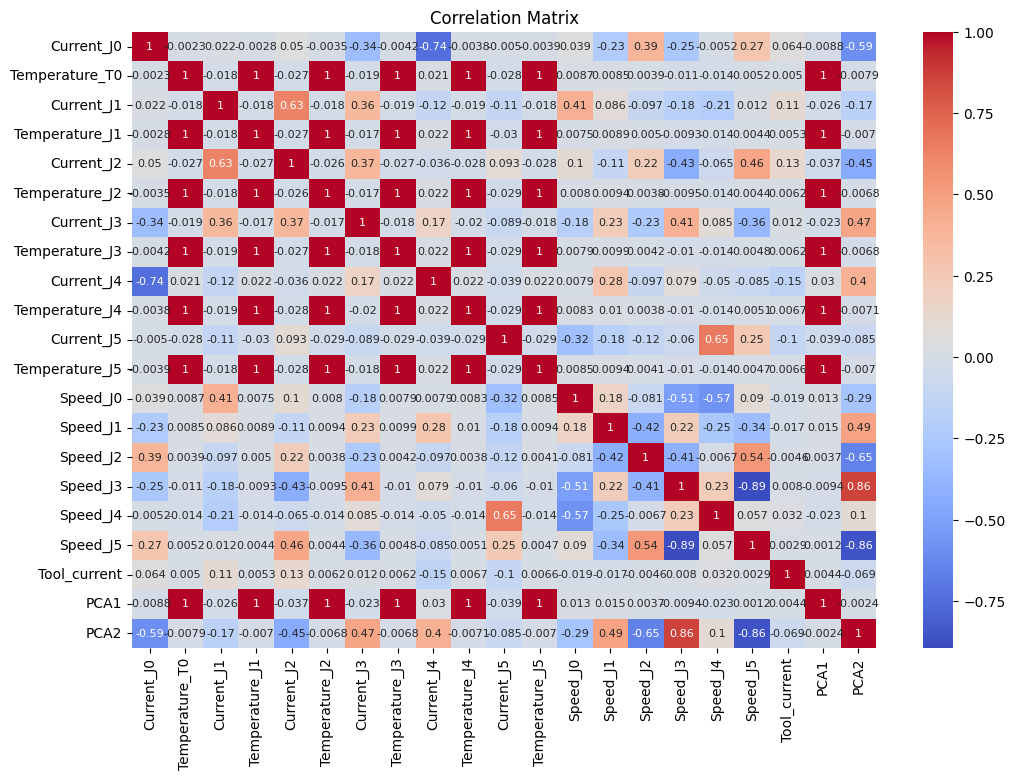

In [18]:
# Feature correlation (correlation matrix)
original_cols = [col for col in df_lagged.columns if col not in ['Timestamp', 'combined_target'] and 'lag' not in col]

plt.figure(figsize=(12, 8))
correlation_matrix = df_lagged[original_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size":8})
plt.title('Correlation Matrix')
plt.show()

On the correlation matrix above each joint temperature has a perfect correlation with other joint temperatures, however, this is expected as these joints are connected. Furthermore, temperature of each joint does not have any strong correlation with other features. To decrease dimensionality, as we have over 100 features (taking lag into consideration), we will remove all features regarding temperature.

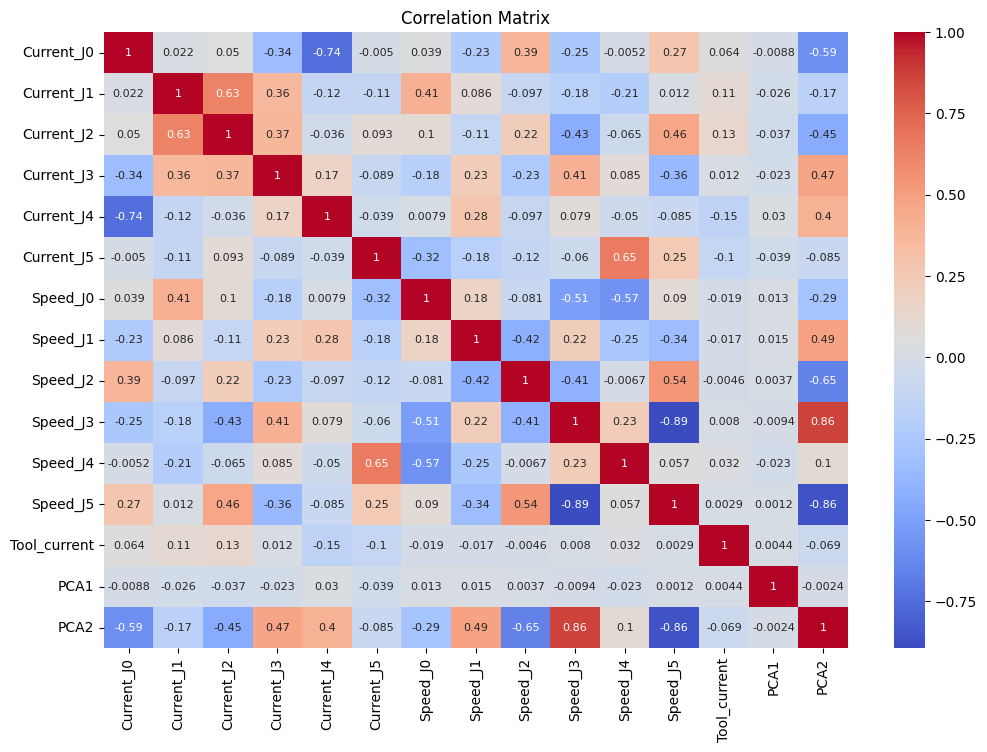

In [19]:
# Removing temperature from dataset

# Create list of columns with temperature
cols_to_drop = [col for col in df_lagged.columns if 'Temp' in col]
df_lagged.drop(columns=cols_to_drop, inplace=True)
original_cols = [col for col in df_lagged.columns if col not in ['Timestamp', 'combined_target'] and 'lag' not in col] # new original cols

# New Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df_lagged[original_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size":8})
plt.title('Correlation Matrix')
plt.show()

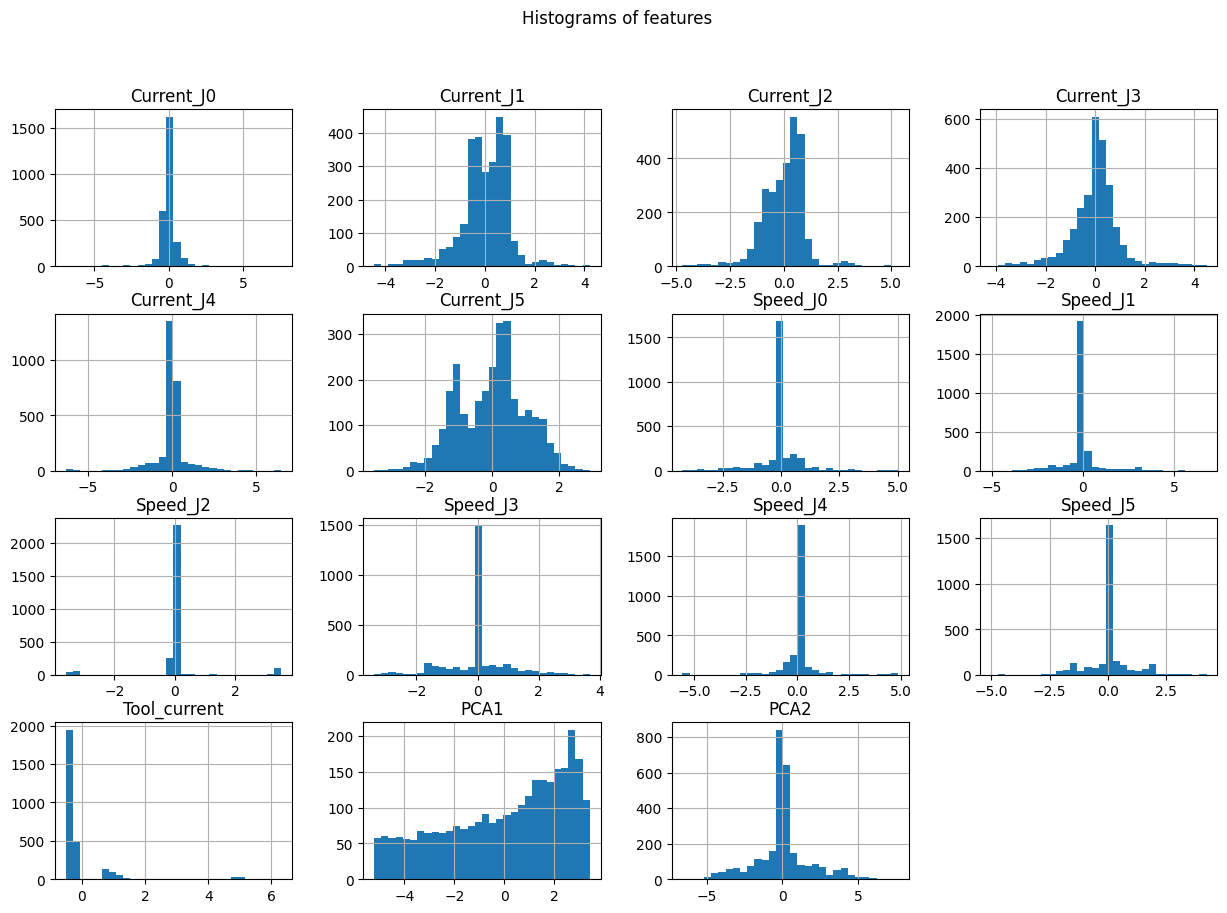

In [20]:
# Plots for feature distribution, target distributions

# Create original cols (lag columns are just the same distribution)

df_lagged[original_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of features')
plt.show()

We choose to ignore skewness as we have a lag window, which makes sure that past data is taken into consideration

<ipython-input-21-e031f49e15d6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_lagged, x='combined_target', palette='viridis')


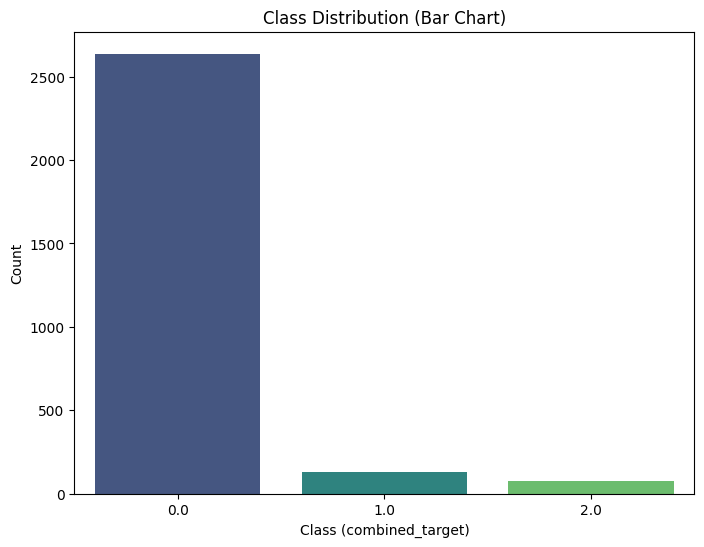

In [21]:
# Class distribution of target

# Plot Class Distribution using a Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df_lagged, x='combined_target', palette='viridis')
plt.title('Class Distribution (Bar Chart)')
plt.xlabel('Class (combined_target)')
plt.ylabel('Count')
plt.show()

As seen above, there is a class imbalance, we will account for this when creating the training data

In [22]:
# Creating Training, validation, and test set
# Change sampling weights of target variable

from sklearn.utils.class_weight import compute_sample_weight

# Since this is time series data, we need to split chronologically to have continuity
df_final = df_lagged.copy()

train_size = 0.7  # 70% for training
val_size = 0.15   # 15% for validation
test_size = 0.15  # 15% for testing

# get the split indicies
train_end = int(len(df_final) * train_size)
val_end = train_end + int(len(df_final) * val_size)

# slicing for dataframe
df_train = df_final[:train_end]  # Training set
df_val = df_final[train_end:val_end]  # Validation set
df_test = df_final[val_end:]  # Test set

x_train = df_train.drop(columns=['Timestamp', 'combined_target'])
y_train = df_train['combined_target']

x_val = df_val.drop(columns=['Timestamp', 'combined_target'])
y_val = df_val['combined_target']

x_test = df_test.drop(columns=['Timestamp', 'combined_target'])
y_test = df_test['combined_target']

sample_weights_train = compute_sample_weight(class_weight='balanced', y=y_train)


# Exploring Models

In [23]:
# Multivariate Logistic Regression, Random forest, XG boost, Neural net for classification

# Set benchmark with multivariate logistic regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


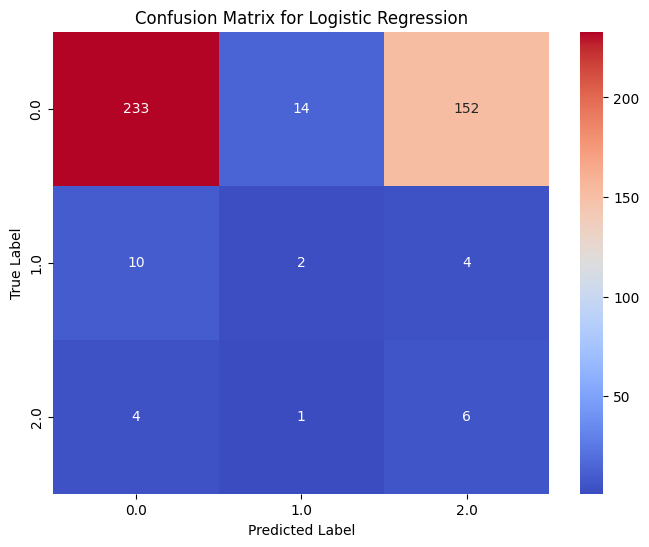

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.94      0.58      0.72       399
         1.0       0.12      0.12      0.12        16
         2.0       0.04      0.55      0.07        11

    accuracy                           0.57       426
   macro avg       0.37      0.42      0.30       426
weighted avg       0.89      0.57      0.68       426

Weighted F1 Score for Logistic Regression: 0.6819857491349893


In [26]:
# Set benchmark with multivariate logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder

# Initialise and train multinomial LR model
# Using multinomial and 'lbfgs' as there are 3 class types
model_LR = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_LR.fit(x_train, y_train, sample_weight=sample_weights_train)

# Make predictions on the validation set
y_pred_LR = model_LR.predict(x_val)

# Create confusion matrix for LR using validation set
cm_lr = confusion_matrix(y_val, y_pred_LR)

le = LabelEncoder()
le.fit(y_train)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Print the classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_val, y_pred_LR))

# Print the weighted F1 score
print("Weighted F1 Score for Logistic Regression:", f1_score(y_val, y_pred_LR, average='weighted'))

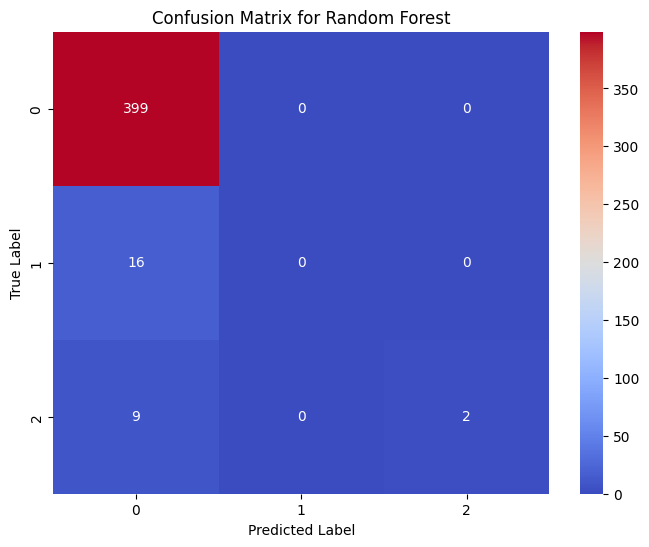

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       399
         1.0       0.00      0.00      0.00        16
         2.0       1.00      0.18      0.31        11

    accuracy                           0.94       426
   macro avg       0.65      0.39      0.43       426
weighted avg       0.91      0.94      0.92       426

Weighted F1 Score for Random Forest: 0.9161134360764707


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train, sample_weight=sample_weights_train)

y_pred_rf = model_rf.predict(x_val)

cm_rf = confusion_matrix(y_val, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=range(len(le.classes_)), yticklabels=range(len(le.classes_)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Print the classification report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_val, y_pred_rf))

# Print the weighted F1 score for Random Forest
print("Weighted F1 Score for Random Forest:", f1_score(y_val, y_pred_rf, average='weighted'))

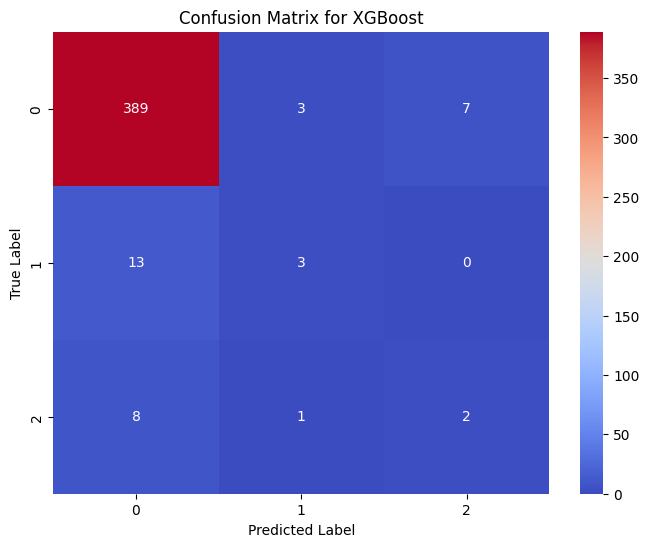

Classification Report for XGBoost:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       399
         1.0       0.43      0.19      0.26        16
         2.0       0.22      0.18      0.20        11

    accuracy                           0.92       426
   macro avg       0.53      0.45      0.47       426
weighted avg       0.91      0.92      0.92       426

Weighted F1 Score for XGBoost: 0.9156917067154543


In [28]:
# XG Boost
import xgboost as xgb

# Make and train XGB
model_xgb = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
model_xgb.fit(x_train, y_train, sample_weight=sample_weights_train)

y_pred_xgb = model_xgb.predict(x_val)

cm_xgb = confusion_matrix(y_val, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=range(len(le.classes_)), yticklabels=range(len(le.classes_)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost')
plt.show()

# Print the classification report for XGBoost
print("Classification Report for XGBoost:")
print(classification_report(y_val, y_pred_xgb))

# Print the weighted F1 score for XGBoost
print("Weighted F1 Score for XGBoost:", f1_score(y_val, y_pred_xgb, average='weighted'))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6747 - loss: 0.8472 - val_accuracy: 0.9366 - val_loss: 0.4365
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9258 - loss: 0.3549 - val_accuracy: 0.9366 - val_loss: 0.2436
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9349 - loss: 0.2537 - val_accuracy: 0.9366 - val_loss: 0.2541
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9296 - loss: 0.2496 - val_accuracy: 0.9366 - val_loss: 0.2637
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9340 - loss: 0.2102 - val_accuracy: 0.9366 - val_loss: 0.2724
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9330 - loss: 0.1983 - val_accuracy: 0.9366 - val_loss: 0.2764
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9311 - loss: 0.1917 - val_accuracy: 0.9366 - val_loss: 0.2719
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9443 - loss: 0.1551 - val_accuracy: 0.9366 - val_loss: 0.2729
Ep

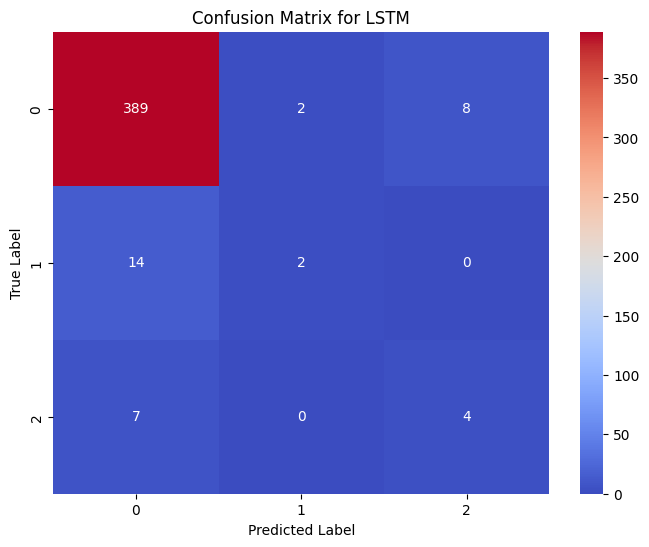

Classification Report for LSTM:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       399
         1.0       0.50      0.12      0.20        16
         2.0       0.33      0.36      0.35        11

    accuracy                           0.93       426
   macro avg       0.59      0.49      0.50       426
weighted avg       0.92      0.93      0.92       426

Weighted F1 Score for LSTM: 0.9172226313939602


In [29]:
# LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Convert dataframe into np array so that we can reshape into needed format for LSTM
x_train_np = np.array(x_train)
x_val_np = np.array(x_val)
x_test_np = np.array(x_test)

# Reshape for LSTM format
x_train_np = x_train_np.reshape(x_train_np.shape[0], 1, x_train_np.shape[1])
x_val_np = x_val_np.reshape(x_val_np.shape[0], 1, x_val_np.shape[1])
x_test_np = x_test_np.reshape(x_test_np.shape[0], 1, x_test_np.shape[1])

# Create LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', input_shape=(x_train_np.shape[1], x_train_np.shape[2])))
# Dropout for regularization
model_lstm.add(Dropout(0.2))
# Specify 3 output classes with softmax activation
model_lstm.add(Dense(3, activation='softmax'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_lstm.fit(x_train_np, y_train, epochs=20, batch_size=32, validation_data=(x_val_np, y_val))

# Make predictions on the validation set
y_pred_lstm = model_lstm.predict(x_val_np)
# Convert probabilities to class labels
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)

# Creating confusion matrix
cm_lstm = confusion_matrix(y_val, y_pred_lstm_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=range(3), yticklabels=range(3))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LSTM')
plt.show()

# Print the classification report for LSTM
print("Classification Report for LSTM:")
print(classification_report(y_val, y_pred_lstm_classes))

# Print the weighted F1 score for LSTM
print("Weighted F1 Score for LSTM:", f1_score(y_val, y_pred_lstm_classes, average='weighted'))


The LSTM model was chosen over the other models (Multinomial Regression, XGBoost, and Random Forest) primarily due to its higher weighted F1 score (0.918), indicating more balanced and effective performance across all classes. Despite having lower precision and recall for the minority classes (i.e. classes that indicated faults), LSTM maintains a strong overall accuracy (92%), similar to XGBoost and Random Forest, while significantly improving the macro average F1 score (0.53) compared to the others.

While Random Forest and XGBoost performed well for class 0, both models struggled with class 1 and class 2, showing poor recall and F1 scores for those classes. This may be an indication of potential class imbalance.

Lastly, we chose to move forward with the LSTM model as it has a high customisation, such as adjusting the layers and drouput rate to improve generalisation. These tunable parameters give LSTM the potential to significantly improve accuracy, especially with the underrepresented classes, and fully adapt to the dataset's patterns over time.

# Model Fine Tuning

In [30]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam

# Create an LSTM model function that we can call manually for hyperparameter tuning
# Had problems using GridSearchCV function (likely to do with updated KerasClassifier)
def create_lstm_model(units=64, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', input_shape=(x_train_np.shape[1], x_train_np.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameters to search manually
param_grid = {
    'units': [32, 64, 128],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}

best_score = 0
best_params = {}

# Manual grid search with nested for loops
for units in param_grid['units']:
    for dropout_rate in param_grid['dropout_rate']:
        for learning_rate in param_grid['learning_rate']:
            for batch_size in param_grid['batch_size']:
                for epochs in param_grid['epochs']:
                    print(f"Training with units={units}, dropout_rate={dropout_rate}, learning_rate={learning_rate}, batch_size={batch_size}, epochs={epochs}")

                    model = create_lstm_model(units=units, dropout_rate=dropout_rate, learning_rate=learning_rate)
                    model.fit(x_train_np, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val_np, y_val), verbose=0)

                    # Evaluate the model on validation data
                    val_loss, val_acc = model.evaluate(x_val_np, y_val, verbose=0)

                    print(f"Validation Accuracy: {val_acc}")

                    if val_acc > best_score:
                        best_score = val_acc
                        best_params = {
                            'units': units,
                            'dropout_rate': dropout_rate,
                            'learning_rate': learning_rate,
                            'batch_size': batch_size,
                            'epochs': epochs
                        }

print("Best Hyperparameters:", best_params)
print("Best Validation Accuracy:", best_score)


Training with units=32, dropout_rate=0.2, learning_rate=0.001, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.934272289276123
Training with units=32, dropout_rate=0.2, learning_rate=0.001, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=32, dropout_rate=0.2, learning_rate=0.001, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=32, dropout_rate=0.2, learning_rate=0.001, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9460093975067139
Training with units=32, dropout_rate=0.2, learning_rate=0.01, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9319248795509338
Training with units=32, dropout_rate=0.2, learning_rate=0.01, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9178403615951538
Training with units=32, dropout_rate=0.2, learning_rate=0.01, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.920187771320343
Training with units=32, dropout_rate=0.2, learning_rate=0.01, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9248826503753662
Training with units=32, dropout_rate=0.2, learning_rate=0.1, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.920187771320343
Training with units=32, dropout_rate=0.2, learning_rate=0.1, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=32, dropout_rate=0.2, learning_rate=0.1, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=32, dropout_rate=0.2, learning_rate=0.1, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=32, dropout_rate=0.3, learning_rate=0.001, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=32, dropout_rate=0.3, learning_rate=0.001, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9248826503753662
Training with units=32, dropout_rate=0.3, learning_rate=0.001, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=32, dropout_rate=0.3, learning_rate=0.001, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=32, dropout_rate=0.3, learning_rate=0.01, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9178403615951538
Training with units=32, dropout_rate=0.3, learning_rate=0.01, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=32, dropout_rate=0.3, learning_rate=0.01, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9295774698257446
Training with units=32, dropout_rate=0.3, learning_rate=0.01, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.920187771320343
Training with units=32, dropout_rate=0.3, learning_rate=0.1, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9295774698257446
Training with units=32, dropout_rate=0.3, learning_rate=0.1, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=32, dropout_rate=0.3, learning_rate=0.1, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=32, dropout_rate=0.3, learning_rate=0.1, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=32, dropout_rate=0.4, learning_rate=0.001, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=32, dropout_rate=0.4, learning_rate=0.001, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=32, dropout_rate=0.4, learning_rate=0.001, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=32, dropout_rate=0.4, learning_rate=0.001, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=32, dropout_rate=0.4, learning_rate=0.01, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.922535240650177
Training with units=32, dropout_rate=0.4, learning_rate=0.01, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9272300601005554
Training with units=32, dropout_rate=0.4, learning_rate=0.01, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9319248795509338
Training with units=32, dropout_rate=0.4, learning_rate=0.01, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9295774698257446
Training with units=32, dropout_rate=0.4, learning_rate=0.1, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9319248795509338
Training with units=32, dropout_rate=0.4, learning_rate=0.1, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=32, dropout_rate=0.4, learning_rate=0.1, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9248826503753662
Training with units=32, dropout_rate=0.4, learning_rate=0.1, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=64, dropout_rate=0.2, learning_rate=0.001, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9436619877815247
Training with units=64, dropout_rate=0.2, learning_rate=0.001, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9319248795509338
Training with units=64, dropout_rate=0.2, learning_rate=0.001, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=64, dropout_rate=0.2, learning_rate=0.001, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9413145780563354
Training with units=64, dropout_rate=0.2, learning_rate=0.01, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.8920187950134277
Training with units=64, dropout_rate=0.2, learning_rate=0.01, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9154929518699646
Training with units=64, dropout_rate=0.2, learning_rate=0.01, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.8849765062332153
Training with units=64, dropout_rate=0.2, learning_rate=0.01, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.8943662047386169
Training with units=64, dropout_rate=0.2, learning_rate=0.1, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=64, dropout_rate=0.2, learning_rate=0.1, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=64, dropout_rate=0.2, learning_rate=0.1, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.84272301197052
Training with units=64, dropout_rate=0.2, learning_rate=0.1, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9272300601005554
Training with units=64, dropout_rate=0.3, learning_rate=0.001, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9319248795509338
Training with units=64, dropout_rate=0.3, learning_rate=0.001, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.934272289276123
Training with units=64, dropout_rate=0.3, learning_rate=0.001, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=64, dropout_rate=0.3, learning_rate=0.001, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9248826503753662
Training with units=64, dropout_rate=0.3, learning_rate=0.01, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9014084339141846
Training with units=64, dropout_rate=0.3, learning_rate=0.01, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.920187771320343
Training with units=64, dropout_rate=0.3, learning_rate=0.01, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9319248795509338
Training with units=64, dropout_rate=0.3, learning_rate=0.01, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.922535240650177
Training with units=64, dropout_rate=0.3, learning_rate=0.1, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=64, dropout_rate=0.3, learning_rate=0.1, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9295774698257446
Training with units=64, dropout_rate=0.3, learning_rate=0.1, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=64, dropout_rate=0.3, learning_rate=0.1, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9154929518699646
Training with units=64, dropout_rate=0.4, learning_rate=0.001, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9413145780563354
Training with units=64, dropout_rate=0.4, learning_rate=0.001, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9389671087265015
Training with units=64, dropout_rate=0.4, learning_rate=0.001, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=64, dropout_rate=0.4, learning_rate=0.001, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9319248795509338
Training with units=64, dropout_rate=0.4, learning_rate=0.01, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9248826503753662
Training with units=64, dropout_rate=0.4, learning_rate=0.01, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.8990610241889954
Training with units=64, dropout_rate=0.4, learning_rate=0.01, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.920187771320343
Training with units=64, dropout_rate=0.4, learning_rate=0.01, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9131455421447754
Training with units=64, dropout_rate=0.4, learning_rate=0.1, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9248826503753662
Training with units=64, dropout_rate=0.4, learning_rate=0.1, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.934272289276123
Training with units=64, dropout_rate=0.4, learning_rate=0.1, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=64, dropout_rate=0.4, learning_rate=0.1, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9248826503753662
Training with units=128, dropout_rate=0.2, learning_rate=0.001, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9319248795509338
Training with units=128, dropout_rate=0.2, learning_rate=0.001, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9154929518699646
Training with units=128, dropout_rate=0.2, learning_rate=0.001, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9389671087265015
Training with units=128, dropout_rate=0.2, learning_rate=0.001, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9295774698257446
Training with units=128, dropout_rate=0.2, learning_rate=0.01, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9061033129692078
Training with units=128, dropout_rate=0.2, learning_rate=0.01, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.8826290965080261
Training with units=128, dropout_rate=0.2, learning_rate=0.01, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9178403615951538
Training with units=128, dropout_rate=0.2, learning_rate=0.01, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9037558436393738
Training with units=128, dropout_rate=0.2, learning_rate=0.1, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9178403615951538
Training with units=128, dropout_rate=0.2, learning_rate=0.1, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.908450722694397
Training with units=128, dropout_rate=0.2, learning_rate=0.1, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.8826290965080261
Training with units=128, dropout_rate=0.2, learning_rate=0.1, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.8779342770576477
Training with units=128, dropout_rate=0.3, learning_rate=0.001, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.934272289276123
Training with units=128, dropout_rate=0.3, learning_rate=0.001, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.908450722694397
Training with units=128, dropout_rate=0.3, learning_rate=0.001, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=128, dropout_rate=0.3, learning_rate=0.001, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9319248795509338
Training with units=128, dropout_rate=0.3, learning_rate=0.01, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9107981324195862
Training with units=128, dropout_rate=0.3, learning_rate=0.01, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9131455421447754
Training with units=128, dropout_rate=0.3, learning_rate=0.01, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9248826503753662
Training with units=128, dropout_rate=0.3, learning_rate=0.01, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9178403615951538
Training with units=128, dropout_rate=0.3, learning_rate=0.1, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.8826290965080261
Training with units=128, dropout_rate=0.3, learning_rate=0.1, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.920187771320343
Training with units=128, dropout_rate=0.3, learning_rate=0.1, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9295774698257446
Training with units=128, dropout_rate=0.3, learning_rate=0.1, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.934272289276123
Training with units=128, dropout_rate=0.4, learning_rate=0.001, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9295774698257446
Training with units=128, dropout_rate=0.4, learning_rate=0.001, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9295774698257446
Training with units=128, dropout_rate=0.4, learning_rate=0.001, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=128, dropout_rate=0.4, learning_rate=0.001, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=128, dropout_rate=0.4, learning_rate=0.01, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.8990610241889954
Training with units=128, dropout_rate=0.4, learning_rate=0.01, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9107981324195862
Training with units=128, dropout_rate=0.4, learning_rate=0.01, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.922535240650177
Training with units=128, dropout_rate=0.4, learning_rate=0.01, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=128, dropout_rate=0.4, learning_rate=0.1, batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9366196990013123
Training with units=128, dropout_rate=0.4, learning_rate=0.1, batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9319248795509338
Training with units=128, dropout_rate=0.4, learning_rate=0.1, batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.9319248795509338
Training with units=128, dropout_rate=0.4, learning_rate=0.1, batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.922535240650177
Best Hyperparameters: {'units': 32, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}
Best Validation Accuracy: 0.9460093975067139


Output from cell block above
Best Hyperparameters: {'units': 32, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}
Best Validation Accuracy: 0.9460093975067139

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2940 - loss: 1.2029 - val_accuracy: 0.8122 - val_loss: 0.7543
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9110 - loss: 0.6126 - val_accuracy: 0.9366 - val_loss: 0.4168
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9157 - loss: 0.4577 - val_accuracy: 0.9366 - val_loss: 0.3214
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9157 - loss: 0.3711 - val_accuracy: 0.9366 - val_loss: 0.2986
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9287 - loss: 0.3035 - val_accuracy: 0.9366 - val_loss: 0.2904
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9281 - loss: 0.2717 - val_accuracy: 0.9366 - val_loss: 0.2812
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9149 - loss: 0.2798 - val_accuracy: 0.9366 - val_loss: 0.2850
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9296 - loss: 0.2465 - val_accuracy: 0.9366 - val_loss: 0.2804
Ep

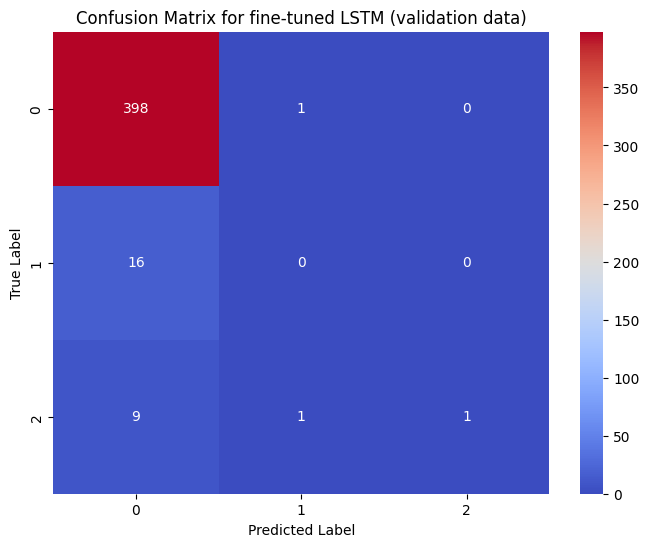

Classification Report for fine-tuned LSTM (validation data):
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       399
         1.0       0.00      0.00      0.00        16
         2.0       1.00      0.09      0.17        11

    accuracy                           0.94       426
   macro avg       0.65      0.36      0.38       426
weighted avg       0.91      0.94      0.91       426

Weighted F1 Score for fine-tuned LSTM (validation data): 0.9112978764721338


In [36]:
# Increasing layers and setting hyperparameters based on grid search parameters

# Creating function to make LSTM
def create_lstm_model(units=32, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    # First LSTM layer
    model.add(LSTM(units=units, activation='relu', return_sequences=False, input_shape=(x_train_np.shape[1], x_train_np.shape[2])))
    model.add(Dropout(dropout_rate))
    # Output Layer
    model.add(Dense(3, activation='softmax'))  # 3 output classes for multiclass classification
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Initialize LSTM with best hyperparameters
model_lstm = create_lstm_model(units=32, dropout_rate=0.2, learning_rate=0.001)
# Training
history = model_lstm.fit(x_train_np, y_train, epochs=20, batch_size=32, validation_data=(x_val_np, y_val))

# Make predictions on the validation set
y_pred_lstm = model_lstm.predict(x_val_np)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)

# Confusion matrix, classification report, and weighted F1 score
cm_lstm = confusion_matrix(y_val, y_pred_lstm_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=range(3), yticklabels=range(3))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for fine-tuned LSTM (validation data)')
plt.show()

print("Classification Report for fine-tuned LSTM (validation data):")
print(classification_report(y_val, y_pred_lstm_classes))

print("Weighted F1 Score for fine-tuned LSTM (validation data):", f1_score(y_val, y_pred_lstm_classes, average='weighted'))

# Finalised model on test set

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


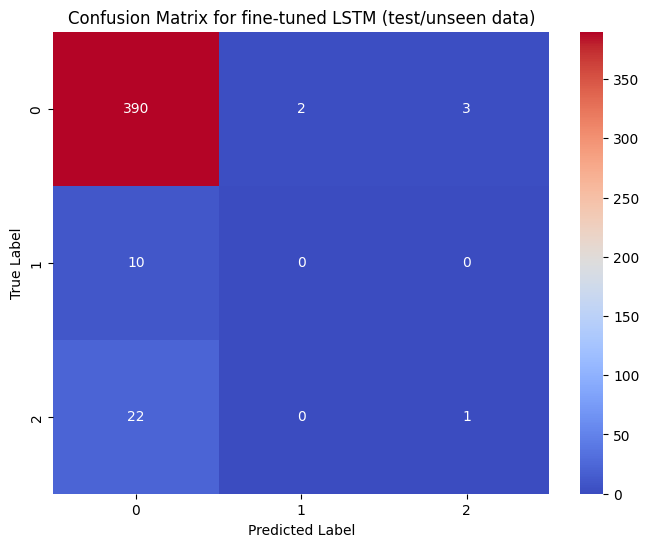

Classification Report for fine-tuned LSTM (test/unseen data):
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       399
         1.0       0.00      0.00      0.00        16
         2.0       1.00      0.09      0.17        11

    accuracy                           0.94       426
   macro avg       0.65      0.36      0.38       426
weighted avg       0.91      0.94      0.91       426

Weighted F1 Score for fine-tuned LSTM (test/unseen data): 0.8850819785342028


In [39]:
# Testing model on test data (unseen)

# use model_lstm (trained on training data) to predict on test/unseen data
y_test_pred_lstm = model_lstm.predict(x_test_np)
y_test_pred_lstm_classes = np.argmax(y_test_pred_lstm, axis=1)

# Confusion matrix, classification report, and weighted F1 score
cm_lstm = confusion_matrix(y_test, y_test_pred_lstm_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=range(3), yticklabels=range(3))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for fine-tuned LSTM (test/unseen data)')
plt.show()

print("Classification Report for fine-tuned LSTM (test/unseen data):")
print(classification_report(y_val, y_pred_lstm_classes))

print("Weighted F1 Score for fine-tuned LSTM (test/unseen data):", f1_score(y_test, y_test_pred_lstm_classes, average='weighted'))